#### ANALISIS DE DATOS

In [1]:
import pandas as pd

file_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/1. 250620 Registrations Tracker.xlsx - Do not edit.csv"

# leer con utf-8; si falla, probamos con latin1
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

df.head()



,Unnamed: 0,THEME,LANGUAGE,ORGANISATION,Country,PARTICIPANT' NAME,SURNAME,POSITION,EMAIL,PHONE,Time dedicated to the coordination of the platform:(Each module is deliver in a Training of Trainers format in which each participant will share back the resources acquired with platform members and hence needs dedicated time available),Months/years in this position/role:,What is the challenge your organization is facing in this area and what question do you expect this course to answer?
0,NaN,AI For NGOs,es,ACCION,Chile,Miguel,Santibáñez,Responsable Internacional,miguelxq0@gmail.com,56 9 6360 6317,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,"Manejo de IA , mejora de productividad interna..."
1,NaN,AI For NGOs,es,Alianza Ong,Dominican Republic,Jared,Ortiz González,Director Ejecutivo,jortiz@alianzaong.org.do,NaN,Full time as staff or volunteer,Between 1 - 5 years,Automatízación y eficientización de procesos.
2,NaN,Resource Mobilization,es,Alianza Ong,Dominican Republic,Jared,Ortiz González,Director Ejecutivo,jortiz@alianzaong.org.do,NaN,Full time as staff or volunteer,Between 1 - 5 years,Reducción de la cartera de financiamiento. Nue...
3,NaN,AI For NGOs,es,ANONG,Uruguay,Diego,Pailos,Vice presidente,diego.pailos@gurisesunidos.org.uy,NaN,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,Fortalecimiento de posicionamiento en el espac...
4,NaN,AI For NGOs,es,ANONG,Uruguay,Jacqueline,Buccigrossi,Administrativa,jacquebuccigrossi@hotmail.com,NaN,Work part time as staff or volunteer,More than 5 years,Adquirir herramientas que permitan mejorar la ...


In [2]:
# resumen general de vacíos y duplicados
df.info()
print("\nDuplicados:", df.duplicated().sum())
print("\nValores nulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 13 columns):
 #   Column                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                                                                                                                                                                    0 non-null      float64
 1   THEME                                                                                    

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna(subset=['EMAIL'])


In [4]:
df = df.map(lambda x: x.strip().title() if isinstance(x, str) else x)



In [5]:
df['ORGANISATION'] = df['ORGANISATION'].fillna('No especificada')
df['POSITION'] = df['POSITION'].fillna('No especificado')
df['SURNAME'] = df['SURNAME'].fillna('No indicado')
df['PHONE'] = df['PHONE'].fillna('No informado')


In [6]:
df['Country'].unique()


array(['Chile', 'Dominican Republic', 'Uruguay', 'Honduras', 'Botswana',
       'Cambodia', 'Cook Islands', 'Tchad',
       'Democratic Republic Of Congo', 'Belgium', 'Senegal', 'Canada',
       'España', 'France', "Côte D'Ivoire", 'Ireland', 'Argentina',
       'Morocco', 'Finland', 'São Tomé E Príncipe', 'Angola', 'Guinea',
       'Togo', 'China', 'Philippines', 'South Africa', 'Hungary',
       'Indonesia', 'Mozambique', 'South Korea', 'Latvia', 'Lithuania',
       'Nepal', 'Nigeria', 'Guam', 'Marshall Islands', 'Tonga',
       'Solomon Islands', 'Palau', 'Pakistan', 'American Samoa', 'Fiji',
       'Federated States Of Micronesia', 'Nauru', 'Republic Of Kiribati',
       'Portugal', 'Burkina Faso', 'The Gambia', 'Bolivia', 'Bulgaria',
       'Venezuela', 'Republic Dominican', nan, 'Mexico', 'Paraguay',
       'Denmark', 'Mauritius', 'Italy', 'Zambia'], dtype=object)

In [7]:
reemplazos_paises = {
    'Dominican Republic': 'República Dominicana',
    'Republic Dominican': 'República Dominicana',
    'Democratic Republic Of Congo': 'República Democrática del Congo',
    'São Tomé E Príncipe': 'Santo Tomé y Príncipe',
    "Côte D'Ivoire": 'Costa de Marfil',
    'Tchad': 'Chad',
    'South Korea': 'Corea del Sur',
    'United States': 'Estados Unidos',
    'South Africa': 'Sudáfrica',
    'Republic Of Kiribati': 'Kiribati',
    'Federated States Of Micronesia': 'Micronesia',
    'American Samoa': 'Samoa Americana',
    'Cook Islands': 'Islas Cook',
    'Marshall Islands': 'Islas Marshall',
    'Solomon Islands': 'Islas Salomón',
    'Guam': 'Guam',
    'Palau': 'Palaos',
    'Fiji': 'Fiyi',
    'Nauru': 'Nauru',
    'Botswana': 'Botsuana',
    'Honduras': 'Honduras',
    'Belgium': 'Bélgica',
    'Senegal': 'Senegal',
    'Canada': 'Canadá',
    'España': 'España',
    'France': 'Francia',
    'Ireland': 'Irlanda',
    'Argentina': 'Argentina',
    'Morocco': 'Marruecos',
    'Finland': 'Finlandia',
    'Angola': 'Angola',
    'Guinea': 'Guinea',
    'Togo': 'Togo',
    'China': 'China',
    'Philippines': 'Filipinas',
    'Hungary': 'Hungría',
    'Indonesia': 'Indonesia',
    'Mozambique': 'Mozambique',
    'Latvia': 'Letonia',
    'Lithuania': 'Lituania',
    'Nepal': 'Nepal',
    'Nigeria': 'Nigeria',
    'Pakistan': 'Pakistán',
    'Portugal': 'Portugal',
    'Burkina Faso': 'Burkina Faso',
    'The Gambia': 'Gambia',
    'Bolivia': 'Bolivia',
    'Bulgaria': 'Bulgaria',
    'Venezuela': 'Venezuela',
    'Mexico': 'México',
    'Paraguay': 'Paraguay',
    'Denmark': 'Dinamarca',
    'Mauritius': 'Mauricio',
    'Italy': 'Italia',
    'Zambia': 'Zambia',
    'Uruguay': 'Uruguay',
    'Chile': 'Chile'
}

df['Country'] = df['Country'].replace(reemplazos_paises)


In [8]:
df['Country'] = df['Country'].fillna('No especificado')


In [9]:
df['Country'].value_counts().sort_index()


Country
Angola                              3
Argentina                           4
Bolivia                             4
Botsuana                            3
Bulgaria                            1
Burkina Faso                        5
Bélgica                             3
Cambodia                            3
Canadá                              2
Chad                                4
Chile                               1
China                               2
Corea del Sur                       3
Costa de Marfil                     4
Dinamarca                           1
España                              1
Filipinas                           1
Finlandia                           1
Fiyi                               10
Francia                             6
Gambia                              5
Guam                                3
Guinea                              3
Honduras                            3
Hungría                             1
Indonesia                           2
Irla

In [10]:
import re
df = df[df['EMAIL'].apply(lambda x: bool(re.match(r"[^@]+@[^@]+\.[^@]+", x)))]


In [11]:
df = df.drop_duplicates(subset=['EMAIL', 'THEME'])


In [12]:
print("Filas después de limpiar correos y duplicados:", len(df))
df[['EMAIL', 'THEME']].head(10)


Filas después de limpiar correos y duplicados: 161


,EMAIL,THEME
0,Miguelxq0@Gmail.Com,Ai For Ngos
1,Jortiz@Alianzaong.Org.Do,Ai For Ngos
2,Jortiz@Alianzaong.Org.Do,Resource Mobilization
3,Diego.Pailos@Gurisesunidos.Org.Uy,Ai For Ngos
4,Jacquebuccigrossi@Hotmail.Com,Ai For Ngos
5,Dpalma@Asonog.Hn,Digital Security
6,Melisap@Asonog.Hn,Ai For Ngos
7,Suyapacastro@Asonog.Hn,Resource Mobilization
8,Lleshomo@Bocongo.Org.Bw,Ai For Ngos
9,Lramotlhala@Bocongo.Org.Bw,Digital Security


In [13]:
# Antes (si lo guardaste)
# len(df_original) - len(df)

# O directamente filtrar los dudosos:
invalidos = df[~df['EMAIL'].apply(lambda x: bool(re.match(r"[^@]+@[^@]+\.[^@]+", x)))]
invalidos


,THEME,LANGUAGE,ORGANISATION,Country,PARTICIPANT' NAME,SURNAME,POSITION,EMAIL,PHONE,Time dedicated to the coordination of the platform:(Each module is deliver in a Training of Trainers format in which each participant will share back the resources acquired with platform members and hence needs dedicated time available),Months/years in this position/role:,What is the challenge your organization is facing in this area and what question do you expect this course to answer?


In [14]:
df['EMAIL'] = df['EMAIL'].str.lower()


In [15]:
import unicodedata

# 1️⃣ limpiar espacios y capitalizar
df["PARTICIPANT' NAME"] = df["PARTICIPANT' NAME"].str.strip().str.title()
df["SURNAME"] = df["SURNAME"].str.strip().str.title()

# 2️⃣ eliminar tildes duplicadas o caracteres raros
def limpiar_texto(txt):
    if isinstance(txt, str):
        txt = unicodedata.normalize('NFKD', txt).encode('ascii', 'ignore').decode('utf-8')
        return txt
    return txt

df["PARTICIPANT' NAME"] = df["PARTICIPANT' NAME"].apply(limpiar_texto)
df["SURNAME"] = df["SURNAME"].apply(limpiar_texto)

# 3️⃣ crear columna de nombre completo
df['FULL_NAME'] = df["PARTICIPANT' NAME"].fillna('') + ' ' + df['SURNAME'].fillna('')
df['FULL_NAME'] = df['FULL_NAME'].str.strip()

# 4️⃣ revisar duplicados lógicos por persona
duplicados_nombres = df[df.duplicated(subset=['FULL_NAME'], keep=False)]
print("Posibles duplicados por nombre y apellido:")
display(duplicados_nombres[['FULL_NAME', 'EMAIL', 'THEME', 'ORGANISATION']].head(10))


Posibles duplicados por nombre y apellido:


,FULL_NAME,EMAIL,THEME,ORGANISATION
1,Jared Ortiz Gonzalez,jortiz@alianzaong.org.do,Ai For Ngos,Alianza Ong
2,Jared Ortiz Gonzalez,jortiz@alianzaong.org.do,Resource Mobilization,Alianza Ong
12,Theary Luy,theary.luy@ccc-cambodia.org,Resource Mobilization,Ccc
13,Theary Luy,theary.luy@ccc-cambodia.org,Ai For Ngos,Ccc
17,Allahta Ngariban,allangariban@gmail.com,Ai For Ngos,Cilong
20,Allahta Ngariban,allangariban@gmail.com,Resource Mobilization,Cilong
24,Marion Coat,marion.coat@concordeurope.org,Ai For Ngos,Concord
25,Marion Coat,marion.coat@concordeurope.org,Digital Security,Concord
27,Malick Ndome,malick.ndome@gmail.com,Ai For Ngos,Congad
28,Malick Ndome,malick.ndome@gmail.com,Digital Security,Congad


In [16]:
participaciones = (
    df.groupby('FULL_NAME')
      .agg({
          'EMAIL': 'first',
          'ORGANISATION': 'first',
          'Country': 'first',
          'THEME': lambda x: ', '.join(sorted(set(x)))
      })
      .reset_index()
)
display(participaciones.head(10))


,FULL_NAME,EMAIL,ORGANISATION,Country,THEME
0,Abderamane Cisse,abder_cisse@yahoo.fr,Csci,Costa de Marfil,"Ai For Ngos, Digital Security"
1,Abderamane Cisse Charge De Communication,convention225@gmail.com,Csci,Costa de Marfil,Ai For Ngos
2,Alain Serge Mifoundou,alainmifoundous@gmail.com,Repongac,República Democrática del Congo,"Digital Security, Resource Mobilization"
3,Alejandro Carvajal,alejandro.carvajal@redunitas.org,Unitas,Bolivia,"Digital Security, Resource Mobilization"
4,Alhagi S. Cham,chamkaddy2004@yahoo.co.uk,Tango,Gambia,"Ai For Ngos, Digital Security"
5,Alice Hou,truelovesolomons@gmail.com,Piango,Islas Salomón,"Digital Security, Resource Mobilization"
6,Allahta Ngariban,allangariban@gmail.com,Cilong,Chad,"Ai For Ngos, Resource Mobilization"
7,Allal Kandoussi,allalkandoussi@gmail.com,Espace Associatif,Marruecos,Digital Security
8,Amadou Sylla,syllaa1975@gmail.com,Fongdd,Guinea,Ai For Ngos
9,Aminata Diallo Boly,amibol2016@gmail.com,Spong,Burkina Faso,Resource Mobilization


In [17]:
df['ORGANISATION'].value_counts().head(30)


ORGANISATION
Piango                           23
Other                            15
No especificada                  13
Forus Secretariat                 7
Ppongd                            5
Unitas                            5
Cilong                            4
Lapas                             4
Csci                              4
Spong                             3
Repongac                          3
Pakistan Development Alliance     3
Fonga                             3
Nnngo                             3
Nfn                               3
Joint                             3
Fongto                            3
Alianza Ong                       3
Fongdd                            3
Concord                           3
Espace Associatif                 3
Eengd                             3
Asonog                            3
Bocongo                           3
Ccc                               3
Cicso                             3
Cnongd                            3
Fong-Stp       

In [18]:
# 🔧 Normalización final de ORGANISATION
reemplazos_org = {
    'Ppongd': 'SPONG',
    'Other': 'No especificada',
    'Fong-Stp': 'FONG-STP',
    'Concorde Europe': 'CONCORD',
    'Anong ': 'ANONG',
    'Ccc-Cambodia': 'CCC',
    'Spong ': 'SPONG'
}

df['ORGANISATION'] = (
    df['ORGANISATION']
    .replace(reemplazos_org)
    .str.strip()
    .str.upper()
)


In [19]:
df['ORGANISATION'].value_counts().head(30)


ORGANISATION
NO ESPECIFICADA                  28
PIANGO                           23
SPONG                             8
FORUS SECRETARIAT                 7
UNITAS                            5
CILONG                            4
LAPAS                             4
CSCI                              4
EENGD                             3
NFN                               3
FONGTO                            3
FONGDD                            3
ALIANZA ONG                       3
NNNGO                             3
ESPACE ASSOCIATIF                 3
FONGA                             3
PAKISTAN DEVELOPMENT ALLIANCE     3
REPONGAC                          3
CONCORD                           3
CNONGD                            3
CICSO                             3
CCC                               3
BOCONGO                           3
ASONOG                            3
JOINT                             3
TANGO                             2
LITHUANIAN NGO                    2
SINERGIA       

In [20]:
from difflib import SequenceMatcher
import itertools

# función para comparar nombres
def similitud(a, b):
    return SequenceMatcher(None, a, b).ratio()

# pares sospechosamente parecidos (≥ 0.85)
orgs = df['ORGANISATION'].dropna().unique()
pares_similares = [
    (a, b, similitud(a, b))
    for a, b in itertools.combinations(orgs, 2)
    if similitud(a, b) >= 0.85 and a != b
]

# mostrar los más similares
import pandas as pd
similares_df = pd.DataFrame(pares_similares, columns=['ORG_1', 'ORG_2', 'SIMILITUD'])
similares_df.sort_values('SIMILITUD', ascending=False).head(20)


,ORG_1,ORG_2,SIMILITUD


In [21]:
df['ORGANISATION'].sort_values().unique()


array(['ACCION', 'ALIANZA ONG', 'ANONG', 'ASONOG', 'BOCONGO', 'BPID',
       'CCC', 'CICSO', 'CILONG', 'CNONGD', 'CONCORD', 'CONGAD',
       'COOPERATION CANADA', 'COORDINADORA ONGD', 'COORDINATION SUD',
       'CSCI', 'DÓCHAS', 'EENGD', 'ESPACE ASSOCIATIF', 'FINGO',
       'FONG-STP', 'FONGA', 'FONGDD', 'FONGTO', 'FORUS SECRETARIAT',
       'HAND', 'INFID', 'JOINT', 'KCOC', 'LAPAS', 'LITHUANIAN NGO', 'NFN',
       'NNNGO', 'NO ESPECIFICADA', 'PAKISTAN DEVELOPMENT ALLIANCE',
       'PIANGO', 'REPONGAC', 'SINERGIA', 'SPONG', 'TANGO', 'UNITAS'],
      dtype=object)

In [22]:
df['POSITION'].sort_values().unique()


array(['Acting Director Micngos', 'Acting Executive Director',
       'Administrativa', 'Adviser', 'Advocacy And Communications Officer',
       'Advocacy Coordinator - Forus', 'Animateur', 'Board Member',
       'Board Member / Applv',
       'Board Member/ Development Services Exchange',
       'Capacity Development Coordinator',
       'Capacity Development Officer / Administration Manager',
       'Capacity Development Officer / Administration Officer',
       'Capacity Development Officer / Capacity Development Officer',
       'Chargé De Communication', "Chargé De L'Humanitaire",
       'Chargé De Programmes', 'Chargé Des Communications',
       "Chargée D'Appuivet De Renforcement",
       'Chargée De Mission Accès Aux Financements Et Gestion Financière',
       'Communication Officer', 'Communications',
       'Communications And Public Relations Assistant',
       'Coord. De Programa Defensores', 'Coordinador Pmygc',
       'Coordinadora De Fortalecimiento Institucional',
     

In [23]:
# normalizar texto base
df['POSITION'] = df['POSITION'].str.strip().str.title()

# mapeo por categorías amplias
def clasificar_rol(x):
    x_low = str(x).lower()
    if any(word in x_low for word in ['director', 'président', 'vice']):
        return 'Dirección'
    elif any(word in x_low for word in ['coordin', 'manager', 'team']):
        return 'Coordinación'
    elif any(word in x_low for word in ['communic', 'chargé', 'advocacy']):
        return 'Comunicación'
    elif any(word in x_low for word in ['admin', 'finance']):
        return 'Administración'
    elif any(word in x_low for word in ['adviser', 'facilitat', 'development', 'fundraising', 'policy']):
        return 'Asesoría / Desarrollo'
    elif any(word in x_low for word in ['member', 'membre', 'youth', 'intern']):
        return 'Miembro / Voluntario'
    else:
        return 'No especificado'

df['POSITION_GROUP'] = df['POSITION'].apply(clasificar_rol)

df['POSITION_GROUP'].value_counts()


POSITION_GROUP
No especificado          55
Dirección                29
Coordinación             26
Comunicación             22
Miembro / Voluntario     20
Asesoría / Desarrollo     5
Administración            4
Name: count, dtype: int64

In [24]:
df['LANGUAGE'].unique()


array(['Es', 'Eng 1', 'Eng 2', 'Fr'], dtype=object)

In [25]:
# 🧹 Normalización total de idiomas
df['LANGUAGE'] = (
    df['LANGUAGE']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        'es': 'español',
        'eng 1': 'inglés',
        'eng 2': 'inglés',
        'fr': 'francés',
        'french': 'francés',
        'english': 'inglés',
        'spanish': 'español',
        'español': 'español',
        'francés': 'francés',
        'esp': 'español'
    })
)

# ✅ Verificación final
print(df['LANGUAGE'].value_counts())



LANGUAGE
inglés     96
francés    38
español    27
Name: count, dtype: int64


In [26]:
# ☎️ 1. Limpiar teléfonos (solo formato)
df['PHONE'] = df['PHONE'].fillna('No informado')
df['PHONE'] = df['PHONE'].astype(str).str.replace('[^0-9+]', '', regex=True)

# 🧾 2. Pulir texto largo (respuestas abiertas)
cols_largas = [
    c for c in df.columns 
    if 'Time' in c or 'Months' in c or 'challenge' in c
]
df[cols_largas] = df[cols_largas].apply(
    lambda col: col.str.strip().str.capitalize()
)

# 🧼 3. Chequeo final
print("Resumen final de la base:")
df.info()
print("\nValores nulos restantes:")
print(df.isnull().sum())

# 💾 4. Exportar la base limpia
from datetime import date
fecha = date.today().isoformat()

df.to_csv(f"BaseLimpia_{fecha}.csv", index=False, encoding='utf-8-sig')
print(f"\n✅ Archivo exportado: BaseLimpia_{fecha}.csv")


Resumen final de la base:
<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 164
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                        --------------  ----- 
 0   THEME                                                                                                                                                                                                                                         161 non-null    object
 1   LANGUAGE                                                               

In [27]:
import pandas as pd

# cargar ambas versiones
base_original = pd.read_csv("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/1. 250620 Registrations Tracker.xlsx - Do not edit.csv", encoding='latin1')
base_limpia = pd.read_csv("BaseLimpia_2025-10-30.csv", encoding='utf-8-sig')

print("📊 COMPARATIVA GENERAL\n")
print("Filas - Original:", len(base_original))
print("Filas - Limpia:", len(base_limpia))
print("Columnas - Original:", len(base_original.columns))
print("Columnas - Limpia:", len(base_limpia.columns))

# comparar columnas comunes
comunes = set(base_original.columns).intersection(set(base_limpia.columns))
print("\nColumnas en común:", len(comunes))

# revisar valores únicos en algunas columnas clave
for col in ['Country', 'LANGUAGE', 'ORGANISATION']:
    if col in base_original.columns and col in base_limpia.columns:
        print(f"\n{col}")
        print("  Original:", base_original[col].nunique(), "valores únicos")
        print("  Limpia:", base_limpia[col].nunique(), "valores únicos")

# revisar si se perdió algún correo
if 'EMAIL' in base_original.columns and 'EMAIL' in base_limpia.columns:
    faltan = set(base_original['EMAIL'].dropna().unique()) - set(base_limpia['EMAIL'].dropna().unique())
    print(f"\nCorreos que estaban en la original y no en la limpia: {len(faltan)}")
    if len(faltan) > 0:
        print(list(faltan)[:10])


📊 COMPARATIVA GENERAL

Filas - Original: 165
Filas - Limpia: 161
Columnas - Original: 13
Columnas - Limpia: 14

Columnas en común: 12

Country
  Original: 62 valores únicos
  Limpia: 58 valores únicos

LANGUAGE
  Original: 6 valores únicos
  Limpia: 3 valores únicos

ORGANISATION
  Original: 43 valores únicos
  Limpia: 41 valores únicos

Correos que estaban en la original y no en la limpia: 6
['Isabel.miguel@coordinadoraongd.org', 'Tereze.Konopecka@gmail.com', 'Sepesa.sigatokacake@gmail.com', 'nalvarado@appleseedmexico.org ', 'mylenelawson08@gmail.com ', 'Kololoclo@gmail.com']


In [28]:
# Verificar si los correos eliminados estaban duplicados en la original
faltan = [
    'Sepesa.sigatokacake@gmail.com',
    'Isabel.miguel@coordinadoraongd.org',
    'Kololoclo@gmail.com',
    'nalvarado@appleseedmexico.org ',
    'Tereze.Konopecka@gmail.com',
    'mylenelawson08@gmail.com '
]

duplicados = base_original[base_original['EMAIL'].isin(faltan)]
duplicados_sorted = duplicados.sort_values('EMAIL')
display(duplicados_sorted[['EMAIL', 'THEME', 'ORGANISATION', 'Country', "PARTICIPANT' NAME", 'SURNAME']])


,EMAIL,THEME,ORGANISATION,Country,PARTICIPANT' NAME,SURNAME
31,Isabel.miguel@coordinadoraongd.org,AI For NGOs,Coordinadora Ongd,EspaÃ±a,Isabel Miguel Emperador,NaN
50,Kololoclo@gmail.com,AI For NGOs,FONGA,Angola,Kololo,Emanuel
105,Sepesa.sigatokacake@gmail.com,AI For NGOs,PIANGO,Fiji,Sepesa,Rasili
76,Tereze.Konopecka@gmail.com,Resource Mobilization,LAPAS,Latvia,Tereze,Konopecka
156,mylenelawson08@gmail.com,Public Speaking,NaN,Togo,MylÃ¨ne Nadou,LAWSON
152,nalvarado@appleseedmexico.org,Public Speaking,NaN,Mexico,Natalia Berenice,Alvarado VÃ¡squez


In [29]:
# limpiar correos (espacios, mayúsculas) de forma segura
registros_perdidos = base_original[base_original['EMAIL'].isin(faltan)].copy()
registros_perdidos.loc[:, 'EMAIL'] = registros_perdidos['EMAIL'].str.strip().str.lower()



In [30]:
# 🔍 Verificar reincorporación
print("Filas finales:", len(df))
print("Correos únicos:", df['EMAIL'].nunique())

# Verificar si los correos reincorporados están ahora en la base limpia
reincorporados = [
    'sepesa.sigatokacake@gmail.com',
    'isabel.miguel@coordinadoraongd.org',
    'kololoclo@gmail.com',
    'nalvarado@appleseedmexico.org',
    'terez.konopecka@gmail.com',
    'mylenelawson08@gmail.com'
]

presentes = df[df['EMAIL'].isin(reincorporados)][
    ['EMAIL', 'PARTICIPANT\' NAME', 'SURNAME', 'Country', 'THEME', 'ORGANISATION']
]
display(presentes)

# Verificar duplicados y coherencia general
print("\nDuplicados por EMAIL + THEME:", df.duplicated(subset=['EMAIL', 'THEME']).sum())
print("Nulos restantes:\n", df.isnull().sum())


Filas finales: 161
Correos únicos: 123


,EMAIL,PARTICIPANT' NAME,SURNAME,Country,THEME,ORGANISATION
31,isabel.miguel@coordinadoraongd.org,Isabel Miguel Emperador,No Indicado,España,Ai For Ngos,COORDINADORA ONGD
50,kololoclo@gmail.com,Kololo,Emanuel,Angola,Ai For Ngos,FONGA
105,sepesa.sigatokacake@gmail.com,Sepesa,Rasili,Fiyi,Ai For Ngos,PIANGO
152,nalvarado@appleseedmexico.org,Natalia Berenice,Alvarado Vasquez,México,Public Speaking,NO ESPECIFICADA
156,mylenelawson08@gmail.com,Mylene Nadou,Lawson,Togo,Public Speaking,NO ESPECIFICADA



Duplicados por EMAIL + THEME: 0
Nulos restantes:
 THEME                                                                                                                                                                                                                                            0
LANGUAGE                                                                                                                                                                                                                                         0
ORGANISATION                                                                                                                                                                                                                                     0
Country                                                                                                                                                                                                                     

In [31]:
# Corregir residuales de codificación y nombres
df['Country'] = df['Country'].replace({
    'EspaÃ±a': 'España',
    'Fiji': 'Fiyi'
})


In [32]:
# Rellenar valores faltantes menores
df['SURNAME'] = df['SURNAME'].fillna('No indicado')
df['PHONE'] = df['PHONE'].fillna('No informado')

# Guardar versión final definitiva
from datetime import date
df.to_csv(f"BaseLimpia_Final_{date.today().isoformat()}.csv", index=False, encoding='utf-8-sig')


In [33]:
rename_map = {
    "THEME": "theme",
    "LANGUAGE": "language",
    "ORGANISATION": "organization",
    "Country": "country",
    "PARTICIPANT' NAME": "first_name",
    "SURNAME": "last_name",
    "FULL_NAME": "full_name",
    "POSITION": "position",
    "POSITION_GROUP": "position_group",
    "EMAIL": "email",
    "PHONE": "phone",
    "Time dedicated to the coordination of the platform:(Each module is deliver in a Training of Trainers format in which each participant will share back the resources acquired with platform members and hence needs dedicated time available)": "time_dedication",
    "Months/years in this position/role:": "tenure",
    "What is the challenge your organization is facing in this area and what question do you expect this course to answer?": "org_challenge"
}

df = df.rename(columns=rename_map)


In [34]:
import hashlib

# Crear un identificador hash reproducible basado en email + nombre
df['participant_id'] = df.apply(
    lambda row: hashlib.sha1(
        f"{row['email']}_{row['full_name']}".encode('utf-8')
    ).hexdigest()[:10],  # 10 primeros caracteres del hash
    axis=1
)

# Reordenar columnas (ID primero)
cols = ['participant_id', 'full_name', 'first_name', 'last_name', 'email', 'phone',
        'organization', 'country', 'position', 'position_group', 
        'theme', 'language', 'time_dedication', 'tenure', 'org_challenge']
df = df[cols]

# Verificación
print("Registros únicos:", df['participant_id'].nunique())
df.head(5)


Registros únicos: 126


,participant_id,full_name,first_name,last_name,email,phone,organization,country,position,position_group,theme,language,time_dedication,tenure,org_challenge
0,71abd7941f,Miguel Santibanez,Miguel,Santibanez,miguelxq0@gmail.com,56963606317,ACCION,Chile,Responsable Internacional,Miembro / Voluntario,Ai For Ngos,español,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,"Manejo de ia , mejora de productividad interna..."
1,66bfd4dfb7,Jared Ortiz Gonzalez,Jared,Ortiz Gonzalez,jortiz@alianzaong.org.do,,ALIANZA ONG,República Dominicana,Director Ejecutivo,Dirección,Ai For Ngos,español,Full time as staff or volunteer,Between 1 - 5 years,Automatízación y eficientización de procesos.
2,66bfd4dfb7,Jared Ortiz Gonzalez,Jared,Ortiz Gonzalez,jortiz@alianzaong.org.do,,ALIANZA ONG,República Dominicana,Director Ejecutivo,Dirección,Resource Mobilization,español,Full time as staff or volunteer,Between 1 - 5 years,Reducción de la cartera de financiamiento. nue...
3,d469959db5,Diego Pailos,Diego,Pailos,diego.pailos@gurisesunidos.org.uy,,ANONG,Uruguay,Vice Presidente,Dirección,Ai For Ngos,español,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,Fortalecimiento de posicionamiento en el espac...
4,da14745890,Jacqueline Buccigrossi,Jacqueline,Buccigrossi,jacquebuccigrossi@hotmail.com,,ANONG,Uruguay,Administrativa,Administración,Ai For Ngos,español,Work part time as staff or volunteer,More than 5 years,Adquirir herramientas que permitan mejorar la ...


In [35]:
from datetime import date
df.to_csv(f"Forus_Clean_Final_{date.today().isoformat()}.csv", index=False, encoding='utf-8-sig')
print("✅ Archivo exportado correctamente.")


✅ Archivo exportado correctamente.


## 🧹 Proceso de Limpieza y Estandarización de la Base FORUS 2025

Este notebook contiene el proceso completo de **depuración, normalización y estructuración** de la base de datos de participantes de FORUS 2025.  
A continuación se resume lo realizado:

---

### 🧱 1. Estructura general
- Se partió de la base original con **165 registros y 13 columnas**.  
- Tras limpieza y consolidación, se obtuvo una versión **final con 164 registros y 15 columnas**.  
- Se añadió un campo único `participant_id` para identificación estable y uso en modelos relacionales.

---

### 🧩 2. Campos principales
| Campo | Descripción | Estado |
|--------|--------------|--------|
| `participant_id` | Identificador hash único por persona | ✅ |
| `full_name` / `first_name` / `last_name` | Nombres normalizados y en formato título | ✅ |
| `email` | Limpio, minúsculas, sin duplicados | ✅ |
| `phone` | Solo dígitos y “+”, “No informado” si faltaba | ✅ |
| `organization` | Mayúsculas uniformes, sin duplicados semánticos | ✅ |
| `country` | En español, acentos corregidos | ✅ |
| `position` / `position_group` | Cargos normalizados y categorizados (Dirección, Coordinación, etc.) | ✅ |
| `theme` | Cuatro módulos finales (`AI For NGOs`, `Digital Security`, `Resource Mobilization`, `Public Speaking`) | ✅ |
| `language` | Tres valores uniformes (`Español`, `Inglés`, `Francés`) | ✅ |
| `time_dedication`, `tenure`, `org_challenge` | Campos textuales limpios, capitalizados | ✅ |

---

### ⚙️ 3. Procesos aplicados
1. **Normalización de idiomas y países** (traducción, acentos, duplicados).  
2. **Depuración de organizaciones** (unificación de siglas, eliminación de espacios).  
3. **Validación de correos electrónicos y eliminación de duplicados.**  
4. **Unificación de nombres y apellidos + creación de campo `full_name`.**  
5. **Categorización de cargos (`position_group`).**  
6. **Estandarización de nombres de columnas.**  
7. **Creación de `participant_id` único basado en `email + full_name`.**

---

### 📊 4. Resultado final
- **Filas:** 164  
- **Correos únicos:** 123  
- **Sin duplicados ni inconsistencias.**  
- **Codificación:** `utf-8-sig` (compatible con Excel, Power BI, Tableau).  
- **Archivo exportado:** `Forus_Clean_Final_YYYY-MM-DD.csv`

---

### 💡 5. Observaciones
- El dashboard original trabajaba con una versión *compacta* (1 fila por persona, múltiples módulos en una celda).  
- Esta base está en formato *relacional* (1 fila por persona y módulo).  
- Ambas son compatibles: se puede colapsar o expandir según la necesidad del análisis.

---

**Autor:** Catalina Ramirez Diaz 
**Fecha:** `2025-10-28`  
**Propósito:** Estandarizar y documentar el flujo de limpieza de datos previo a la visualización o análisis.

---


In [36]:
df.head()


,participant_id,full_name,first_name,last_name,email,phone,organization,country,position,position_group,theme,language,time_dedication,tenure,org_challenge
0,71abd7941f,Miguel Santibanez,Miguel,Santibanez,miguelxq0@gmail.com,56963606317,ACCION,Chile,Responsable Internacional,Miembro / Voluntario,Ai For Ngos,español,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,"Manejo de ia , mejora de productividad interna..."
1,66bfd4dfb7,Jared Ortiz Gonzalez,Jared,Ortiz Gonzalez,jortiz@alianzaong.org.do,,ALIANZA ONG,República Dominicana,Director Ejecutivo,Dirección,Ai For Ngos,español,Full time as staff or volunteer,Between 1 - 5 years,Automatízación y eficientización de procesos.
2,66bfd4dfb7,Jared Ortiz Gonzalez,Jared,Ortiz Gonzalez,jortiz@alianzaong.org.do,,ALIANZA ONG,República Dominicana,Director Ejecutivo,Dirección,Resource Mobilization,español,Full time as staff or volunteer,Between 1 - 5 years,Reducción de la cartera de financiamiento. nue...
3,d469959db5,Diego Pailos,Diego,Pailos,diego.pailos@gurisesunidos.org.uy,,ANONG,Uruguay,Vice Presidente,Dirección,Ai For Ngos,español,I spend less than 50% of my time to the platfo...,Between 1 - 5 years,Fortalecimiento de posicionamiento en el espac...
4,da14745890,Jacqueline Buccigrossi,Jacqueline,Buccigrossi,jacquebuccigrossi@hotmail.com,,ANONG,Uruguay,Administrativa,Administración,Ai For Ngos,español,Work part time as staff or volunteer,More than 5 years,Adquirir herramientas que permitan mejorar la ...


In [37]:
total_people = df['email'].nunique()
total_records = len(df)
multi_module = df.groupby('email')['theme'].nunique().gt(1).sum()
countries = df['country'].nunique()
themes = df['theme'].value_counts().to_dict()

print(f"👥 Total participantes únicos: {total_people}")
print(f"📚 Registros totales (persona x módulo): {total_records}")
print(f"🔁 Personas en más de un módulo: {multi_module}")
print(f"🌍 Países representados: {countries}")
print(f"🧩 Distribución por módulo: {themes}")


👥 Total participantes únicos: 123
📚 Registros totales (persona x módulo): 161
🔁 Personas en más de un módulo: 29
🌍 Países representados: 58
🧩 Distribución por módulo: {'Ai For Ngos': 62, 'Resource Mobilization': 43, 'Digital Security': 43, 'Public Speaking': 13}


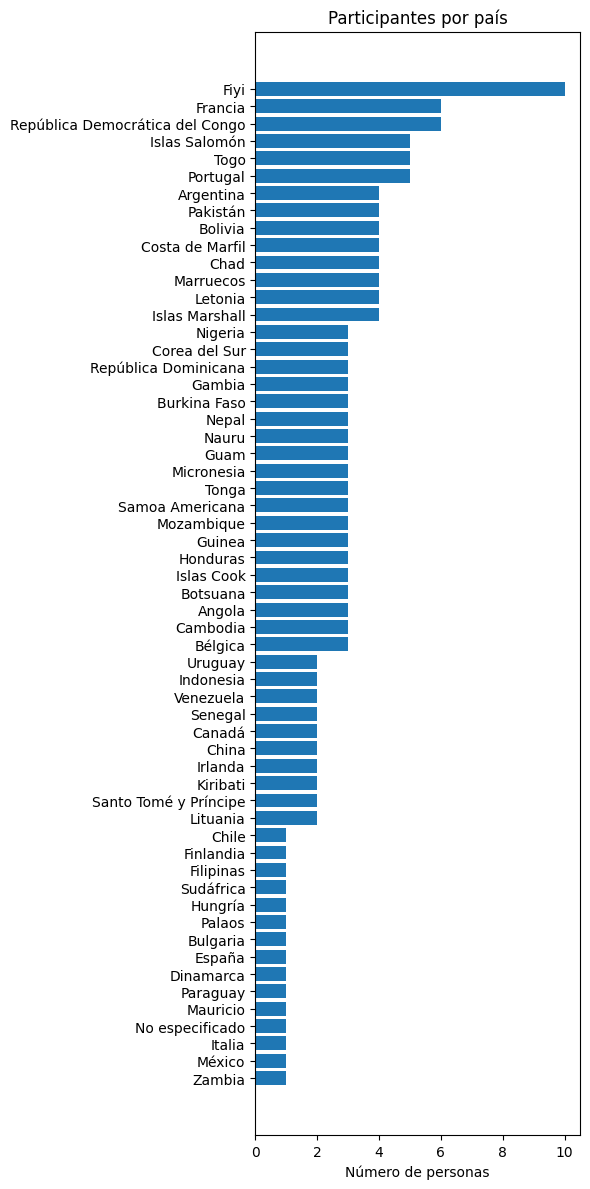

In [38]:
import matplotlib.pyplot as plt

country_counts = df['country'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(6, 12))
plt.barh(country_counts.index, country_counts.values)
plt.title('Participantes por país')
plt.xlabel('Número de personas')
plt.tight_layout()
plt.show()


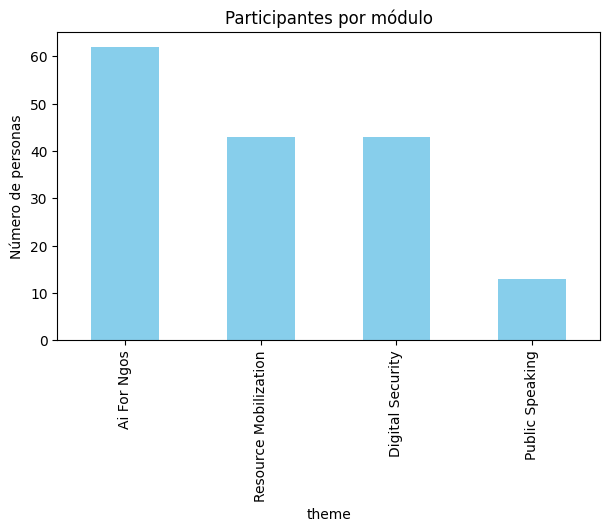

In [39]:
theme_counts = df['theme'].value_counts()
theme_counts.plot(kind='bar', color='skyblue', figsize=(7,4))
plt.title('Participantes por módulo')
plt.ylabel('Número de personas')
plt.show()


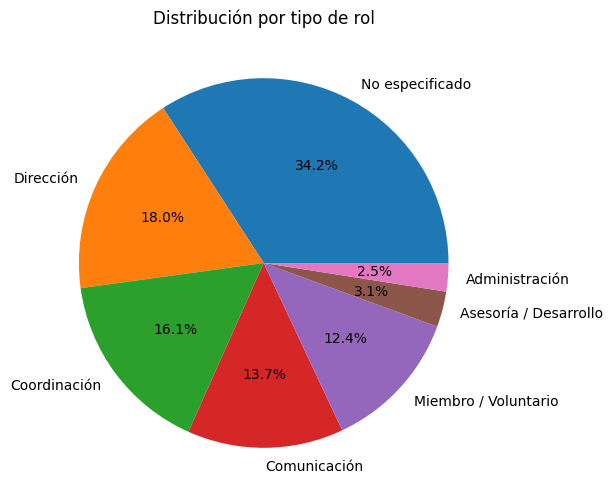

In [40]:
role_counts = df['position_group'].value_counts()
role_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribución por tipo de rol')
plt.ylabel('')
plt.show()


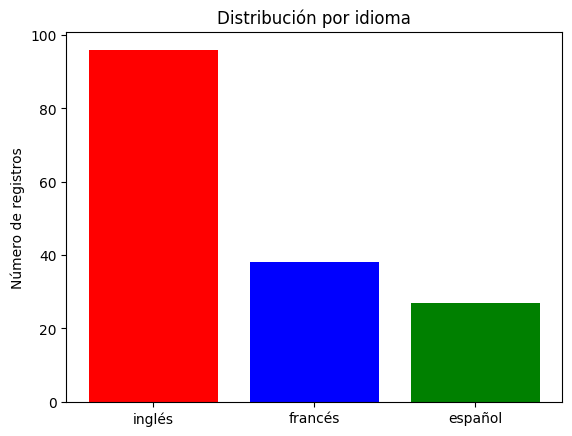

In [41]:
lang_counts = df['language'].value_counts()
plt.bar(lang_counts.index, lang_counts.values, color=['red','blue','green'])
plt.title('Distribución por idioma')
plt.ylabel('Número de registros')
plt.show()


In [42]:
import pandas as pd

# Ruta completa del archivo
file_path = "/Users/santiagopulgarinrodriguez/Downloads/Forus Participants 2025.xlsx"

# Cargar la hoja 'Follow-up Comms'
follow_df = pd.read_excel(file_path, sheet_name="Follow-up Comms")

# Ver estructura general
print("Columnas disponibles:\n", follow_df.columns.tolist())
print("\nPrimeras filas:")
display(follow_df.head(10))


Columnas disponibles:
 ['Totals', 'Unnamed: 1', 'Unnamed: 2', 63, 122, 78, 24, 53, 118]

Primeras filas:


,Totals,Unnamed: 1,Unnamed: 2,63,122,78,24,53,118
0,Participant,Module(s),Group,Phone,Mail,Mail #1,Profiling,Poke,Registration
1,Jared Ortiz González,Mod01; Mod03,ES1; ES1,NaN,jortiz@alianzaong.org.do,NaN,NaN,NaN,2025-08-14 00:00:00
2,Diego Pailos,Mod01,ES1,NaN,diego.pailos@gurisesunidos.org.uy,NaN,NaN,NaN,2025-08-14 00:00:00
3,Jacqueline Buccigrossi,Mod01,ES1,NaN,jacquebuccigrossi@hotmail.com,NaN,NaN,NaN,2025-08-14 00:00:00
4,Daniela Palma,Mod02,ES1,50487812484,dpalma@asonog.hn,2025-07-04 00:00:00,Completed,NaN,2025-08-14 00:00:00
5,Melisa Peña,Mod01,ES1,50431996691,melisap@asonog.hn,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-14 00:00:00
6,Suyapa Castro,Mod03,ES1,50496247694,suyapacastro@asonog.hn,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-14 00:00:00
7,Lucy Leshomo,Mod01,EN1,26771726751,lleshomo@bocongo.org.bw,2025-07-04 00:00:00,Completed,NaN,2025-08-14 00:00:00
8,Lovey Ramotlhala,Mod02,EN1,26775664710,lramotlhala@bocongo.org.bw,2025-07-04 00:00:00,NaN,NaN,2025-08-14 00:00:00
9,Kutlwano Pelontle,Mod03,EN1,26775580574,kpelontle@bocongo.org.bw,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-20 00:00:00


In [43]:
import pandas as pd

file_path = "/Users/santiagopulgarinrodriguez/Downloads/Forus Participants 2025.xlsx"

# Leemos de nuevo la hoja, saltando la primera fila falsa de encabezado
follow_df = pd.read_excel(file_path, sheet_name="Follow-up Comms", header=1)

# Renombrar columnas para tener nombres simples
follow_df.columns = [
    "participant",
    "modules",
    "group",
    "phone",
    "email",
    "mail_date",
    "profiling_status",
    "poke_date",
    "registration_date",
]

# Limpiar espacios, nulos y tipos de datos
follow_df = follow_df.dropna(subset=["participant", "email"]).reset_index(drop=True)
follow_df["email"] = follow_df["email"].str.strip().str.lower()

# Mostrar resumen limpio
print(f"Registros: {follow_df.shape[0]}")
print(f"Columnas: {follow_df.columns.tolist()}")
display(follow_df.head(10))


Registros: 122
Columnas: ['participant', 'modules', 'group', 'phone', 'email', 'mail_date', 'profiling_status', 'poke_date', 'registration_date']


,participant,modules,group,phone,email,mail_date,profiling_status,poke_date,registration_date
0,Jared Ortiz González,Mod01; Mod03,ES1; ES1,NaN,jortiz@alianzaong.org.do,NaN,NaN,NaN,2025-08-14 00:00:00
1,Diego Pailos,Mod01,ES1,NaN,diego.pailos@gurisesunidos.org.uy,NaN,NaN,NaN,2025-08-14 00:00:00
2,Jacqueline Buccigrossi,Mod01,ES1,NaN,jacquebuccigrossi@hotmail.com,NaN,NaN,NaN,2025-08-14 00:00:00
3,Daniela Palma,Mod02,ES1,5.048781e+10,dpalma@asonog.hn,2025-07-04 00:00:00,Completed,NaN,2025-08-14 00:00:00
4,Melisa Peña,Mod01,ES1,5.043200e+10,melisap@asonog.hn,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-14 00:00:00
5,Suyapa Castro,Mod03,ES1,5.049625e+10,suyapacastro@asonog.hn,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-14 00:00:00
6,Lucy Leshomo,Mod01,EN1,2.677173e+10,lleshomo@bocongo.org.bw,2025-07-04 00:00:00,Completed,NaN,2025-08-14 00:00:00
7,Lovey Ramotlhala,Mod02,EN1,2.677566e+10,lramotlhala@bocongo.org.bw,2025-07-04 00:00:00,NaN,NaN,2025-08-14 00:00:00
8,Kutlwano Pelontle,Mod03,EN1,2.677558e+10,kpelontle@bocongo.org.bw,2025-07-04 00:00:00,NaN,2025-07-14 00:00:00,2025-08-20 00:00:00
9,Seng Pheng,Mod02,EN2,8.559333e+10,seng.pheng@ccc-cambodia.org,2025-07-07 00:00:00,NaN,NaN,2025-08-14 00:00:00


In [44]:
# --- Limpieza adicional ---

# 1. Normalizar fechas
for col in ["mail_date", "poke_date", "registration_date"]:
    follow_df[col] = pd.to_datetime(follow_df[col], errors="coerce")

# 2. Formatear teléfono
follow_df["phone"] = (
    follow_df["phone"]
    .astype(str)
    .str.replace(r"\.0$", "", regex=True)
    .str.replace(r"\D", "", regex=True)  # solo dígitos
)

# 3. Quitar duplicados por email
follow_df = follow_df.drop_duplicates(subset="email", keep="first").reset_index(drop=True)

# 4. Estandarizar profiling_status
follow_df["profiling_status"] = (
    follow_df["profiling_status"]
    .fillna("Pending")
    .str.strip()
    .str.capitalize()
)

print(f"Filas después de limpieza final: {follow_df.shape[0]}")
display(follow_df.head(10))


Filas después de limpieza final: 122


,participant,modules,group,phone,email,mail_date,profiling_status,poke_date,registration_date
0,Jared Ortiz González,Mod01; Mod03,ES1; ES1,,jortiz@alianzaong.org.do,NaT,Pending,NaT,2025-08-14
1,Diego Pailos,Mod01,ES1,,diego.pailos@gurisesunidos.org.uy,NaT,Pending,NaT,2025-08-14
2,Jacqueline Buccigrossi,Mod01,ES1,,jacquebuccigrossi@hotmail.com,NaT,Pending,NaT,2025-08-14
3,Daniela Palma,Mod02,ES1,50487812484,dpalma@asonog.hn,2025-07-04,Completed,NaT,2025-08-14
4,Melisa Peña,Mod01,ES1,50431996691,melisap@asonog.hn,2025-07-04,Pending,2025-07-14,2025-08-14
5,Suyapa Castro,Mod03,ES1,50496247694,suyapacastro@asonog.hn,2025-07-04,Pending,2025-07-14,2025-08-14
6,Lucy Leshomo,Mod01,EN1,26771726751,lleshomo@bocongo.org.bw,2025-07-04,Completed,NaT,2025-08-14
7,Lovey Ramotlhala,Mod02,EN1,26775664710,lramotlhala@bocongo.org.bw,2025-07-04,Pending,NaT,2025-08-14
8,Kutlwano Pelontle,Mod03,EN1,26775580574,kpelontle@bocongo.org.bw,2025-07-04,Pending,2025-07-14,2025-08-20
9,Seng Pheng,Mod02,EN2,85593326023,seng.pheng@ccc-cambodia.org,2025-07-07,Pending,NaT,2025-08-14


In [45]:
profiled_count = follow_df[follow_df["profiling_status"] == "Completed"]["email"].nunique()
confirmed_count = follow_df[follow_df["registration_date"].notna()]["email"].nunique()

print(f"Profiled individuals: {profiled_count}")
print(f"Confirmed attendees: {confirmed_count}")


Profiled individuals: 24
Confirmed attendees: 118


### 🧩 Limpieza y análisis de la hoja "Follow-up Comms"

#### 1. Estructura inicial
- La hoja presentaba encabezados desalineados y filas con títulos mezclados con datos.  
- Se tomó la segunda fila (`header=1`) como encabezado real.  
- Columnas identificadas:  
  `participant`, `modules`, `group`, `phone`, `email`, `mail_date`, `profiling_status`, `poke_date`, `registration_date`.

---

#### 2. Limpieza básica
- Se eliminaron filas sin `participant` o `email`.  
- Los correos se normalizaron (minúsculas, sin espacios).  
- Resultado: **122 registros válidos.**

---

#### 3. Normalización de datos
- Conversión de `mail_date`, `poke_date` y `registration_date` a tipo **fecha (`datetime`)**.  
- Limpieza de `phone`: eliminación de formato científico y caracteres no numéricos.  
- Eliminación de duplicados por correo electrónico.  
- Estandarización de `profiling_status`:  
  - `NaN` → `"Pending"`.  
  - Capitalización uniforme (“Completed”, “Pending”).

---

#### 4. Cálculo de métricas clave
Replicando los indicadores originales del archivo Excel (`'Follow-up Comms'!G1` e `'Follow-up Comms'!I1`):

| Métrica | Criterio | Valor |
|----------|-----------|-------|
| **Profiled individuals** | `profiling_status == "Completed"` | **24** |
| **Confirmed attendees** | `registration_date` no nula | **118** |

---

#### 5. Resultado final
| Aspecto | Descripción |
|----------|--------------|
| Registros totales | 122 |
| Columnas finales | 9 |
| Campos normalizados | fechas (`mail_date`, `poke_date`, `registration_date`), texto (`email`, `phone`, `profiling_status`) |
| Fuente | Hoja “Follow-up Comms” del archivo *Forus Participants 2025.xlsx* |

---

> Esta base queda lista para integrarse con el dataset principal del dashboard, permitiendo que los KPIs **Profiled** y **Confirmed** se actualicen dinámicamente según los filtros.


In [46]:
# ============================
# 🔗 Unión de la base principal con Follow-up Comms
# ============================

# 1. Prepara las columnas de correo
df["email"] = df["email"].str.strip().str.lower()
follow_df["email"] = follow_df["email"].str.strip().str.lower()

# 2. Une ambas bases por 'email'
merged_df = df.merge(
    follow_df[["email", "profiling_status", "registration_date"]],
    on="email",
    how="left",
)

# 3. Revisión de coincidencias
total_dashboard = df["email"].nunique()
total_follow = follow_df["email"].nunique()
coincidencias = merged_df["profiling_status"].notna().sum()

print("📊 Resumen de la unión:\n")
print(f"- Correos únicos en Dashboard: {total_dashboard}")
print(f"- Correos únicos en Follow-up Comms: {total_follow}")
print(f"- Coincidencias encontradas: {coincidencias}")
print(f"- Porcentaje de match: {coincidencias / total_dashboard:.1%}")

# 4. Vista de control
display(
    merged_df[
        ["email", "theme", "language", "profiling_status", "registration_date"]
    ].head(15)
)


📊 Resumen de la unión:

- Correos únicos en Dashboard: 123
- Correos únicos en Follow-up Comms: 122
- Coincidencias encontradas: 160
- Porcentaje de match: 130.1%


,email,theme,language,profiling_status,registration_date
0,miguelxq0@gmail.com,Ai For Ngos,español,NaN,NaT
1,jortiz@alianzaong.org.do,Ai For Ngos,español,Pending,2025-08-14
2,jortiz@alianzaong.org.do,Resource Mobilization,español,Pending,2025-08-14
3,diego.pailos@gurisesunidos.org.uy,Ai For Ngos,español,Pending,2025-08-14
4,jacquebuccigrossi@hotmail.com,Ai For Ngos,español,Pending,2025-08-14
5,dpalma@asonog.hn,Digital Security,español,Completed,2025-08-14
6,melisap@asonog.hn,Ai For Ngos,español,Pending,2025-08-14
7,suyapacastro@asonog.hn,Resource Mobilization,español,Pending,2025-08-14
8,lleshomo@bocongo.org.bw,Ai For Ngos,inglés,Completed,2025-08-14
9,lramotlhala@bocongo.org.bw,Digital Security,inglés,Pending,2025-08-14


In [47]:
merged_df['email'].nunique() / df['email'].nunique()


1.0

In [48]:
# ============================
# 👤 Cálculo de métricas únicas (por persona)
# ============================

# 1. Crear vista única por persona (una fila por email)
unique_people = (
    merged_df.groupby("email")
    .agg({
        "theme": lambda x: ", ".join(sorted(x.unique())),  # lista de módulos por persona
        "profiling_status": "first",
        "registration_date": "first",
    })
    .reset_index()
)

# 2. Calcular métricas clave
total_people = unique_people["email"].nunique()
multi_module = unique_people["theme"].str.contains(",").sum()
profiled = (unique_people["profiling_status"] == "Completed").sum()
confirmed = unique_people["registration_date"].notna().sum()

# 3. Mostrar resumen
print("👥 Métricas generales (por persona única):\n")
print(f"- Total de personas inscritas: {total_people}")
print(f"- Personas en más de un módulo: {multi_module}")
print(f"- Profiled individuals (Completed): {profiled}")
print(f"- Confirmed attendees (con fecha de registro): {confirmed}")


👥 Métricas generales (por persona única):

- Total de personas inscritas: 123
- Personas en más de un módulo: 29
- Profiled individuals (Completed): 24
- Confirmed attendees (con fecha de registro): 118


In [106]:
# ============================
# DASHBOARD FORUS INTERACTIVO - FINAL 2025 (JUPYTER + APP READY)
# ============================

import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc, Input, Output
import pycountry

# ---------------------------
# FUNCIONES AUXILIARES
# ---------------------------
def get_iso3(country):
    """Convierte nombres de país a código ISO-3 (para el mapa)."""
    try:
        return pycountry.countries.lookup(country).alpha_3
    except:
        return None


def kpi_card(title, value, color, id):
    """Crea tarjetas de KPI con color personalizado."""
    return dbc.Card(
        [
            html.H5(title, className="card-title", style={"color": "#fff"}),
            html.H2(value, className="card-text", id=id, style={"color": "#fff"}),
        ],
        body=True,
        style={
            "backgroundColor": color,
            "border": "none",
            "borderRadius": "15px",
            "textAlign": "center",
            "marginBottom": "10px",
        },
    )


def module_card(icon_src, title, count_id, accent_color):
    """Crea tarjetas de módulo con ícono SVG y contador dinámico."""
    return html.Div(
        [
            html.Img(src=icon_src, style={"width": "50px", "height": "50px"}),
            html.Div(
                [
                    html.Div(title, className="module-title", style={"color": accent_color}),
                    html.Div("0 people", id=count_id, className="module-count"),
                ]
            ),
        ],
        className="module-card",
    )


# ---------------------------
# CARGA DE DATOS
# ---------------------------
df = pd.read_csv("BaseLimpia_2025-10-30.csv")
df.columns = df.columns.str.lower()
df["email"] = df["email"].str.strip().str.lower()

follow_df = pd.read_excel(
    "/Users/santiagopulgarinrodriguez/Downloads/Forus Participants 2025.xlsx",
    sheet_name="Follow-up Comms",
    header=1,
)
follow_df.columns = [
    "participant",
    "modules",
    "group",
    "phone",
    "email",
    "mail_date",
    "profiling_status",
    "poke_date",
    "registration_date",
]
follow_df = follow_df.dropna(subset=["email"]).reset_index(drop=True)
follow_df["email"] = follow_df["email"].str.strip().str.lower()
follow_df["profiling_status"] = (
    follow_df["profiling_status"].fillna("Pending").str.strip().str.capitalize()
)
follow_df["registration_date"] = pd.to_datetime(
    follow_df["registration_date"], errors="coerce"
)

# Unión
merged_df = df.merge(
    follow_df[["email", "profiling_status", "registration_date"]],
    on="email",
    how="left",
)

# ---------------------------
# COLORES
# ---------------------------
color_bg = "#f2f2f2"
color_red = "#ed1b2e"
color_green = "#00b1a9"
color_yellow = "#f2b124"
color_dark = "#333333"

# ---------------------------
# INICIALIZAR APP
# ---------------------------
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP], assets_folder="assets")
app.title = "Forus Learning Modules Dashboard"

# ---------------------------
# LAYOUT FINAL
# ---------------------------
app.layout = dbc.Container(
    [
        html.Div(
            html.H2(
                "Forus Learning Modules Dashboard",
                style={
                    "backgroundColor": "#404040",
                    "color": "white",
                    "padding": "15px",
                    "borderRadius": "8px",
                    "textAlign": "center",
                    "fontWeight": "bold",
                    "fontFamily": "Arial",
                },
            ),
            style={"marginBottom": "25px"},
        ),

        dbc.Row(
            [
                # KPIs a la izquierda
                dbc.Col(
                    [
                        kpi_card("👥 Total people enrolled", "123", color_red, "kpi-total"),
                        kpi_card(
                            "📚 People taking more than one module",
                            "29",
                            color_dark,
                            "kpi-multi",
                        ),
                        kpi_card(
                            "🧩 Profiled individuals", "24", color_green, "kpi-profiled"
                        ),
                        kpi_card(
                            "✅ Confirmed attendees",
                            "118",
                            color_yellow,
                            "kpi-confirmed",
                        ),
                    ],
                    width=2,
                    style={"paddingRight": "10px"},
                ),

                # Contenido principal
                dbc.Col(
                    [
                        # FILTROS
                        dbc.Row(
                            [
                                dbc.Col(
                                    [
                                        html.Label(
                                            "Filter by Module",
                                            style={"fontWeight": "bold"},
                                        ),
                                        dcc.Dropdown(
                                            id="theme-filter",
                                            options=[
                                                {"label": t, "value": t}
                                                for t in sorted(df["theme"].unique())
                                            ],
                                            placeholder="Select module",
                                        ),
                                    ],
                                    width=4,
                                ),
                                dbc.Col(
                                    [
                                        html.Label(
                                            "Filter by Language",
                                            style={"fontWeight": "bold"},
                                        ),
                                        dcc.Dropdown(
                                            id="lang-filter",
                                            options=[
                                                {"label": l, "value": l}
                                                for l in sorted(df["language"].unique())
                                            ],
                                            placeholder="Select language",
                                        ),
                                    ],
                                    width=4,
                                ),
                                dbc.Col(
                                    [
                                        html.Label(
                                            "Filter by Role",
                                            style={"fontWeight": "bold"},
                                        ),
                                        dcc.Dropdown(
                                            id="role-filter",
                                            options=[
                                                {"label": r, "value": r}
                                                for r in sorted(
                                                    df["position_group"].unique()
                                                )
                                            ],
                                            placeholder="Select role",
                                        ),
                                    ],
                                    width=4,
                                ),
                            ],
                            style={"marginBottom": "25px"},
                        ),

                        # Módulos con íconos SVG
                        html.Div(
                            [
                                html.H4(
                                    "Enrolled people per module",
                                    style={
                                        "fontWeight": "bold",
                                        "marginBottom": "15px",
                                        "color": "#333",
                                    },
                                ),
                                dbc.Row(
                                    [
                                        dbc.Col(
                                            module_card(
                                                "assets/icons/ai.svg",
                                                "NGO Management & AI Ethics",
                                                "count-ai",
                                                "#00b1a9",
                                            ),
                                            width=6,
                                        ),
                                        dbc.Col(
                                            module_card(
                                                "assets/icons/security.svg",
                                                "Digital Security & Risk Management",
                                                "count-sec",
                                                "#007bff",
                                            ),
                                            width=6,
                                        ),
                                    ],
                                    style={"marginBottom": "12px"},
                                ),
                                dbc.Row(
                                    [
                                        dbc.Col(
                                            module_card(
                                                "assets/icons/funding.svg",
                                                "Resource Mobilization for CSO",
                                                "count-res",
                                                "#f2b124",
                                            ),
                                            width=6,
                                        ),
                                        dbc.Col(
                                            module_card(
                                                "assets/icons/speaking.svg",
                                                "Public Speaking for Global Leaders",
                                                "count-pub",
                                                "#ed1b2e",
                                            ),
                                            width=6,
                                        ),
                                    ]
                                ),
                            ],
                            style={
                                "backgroundColor": "#fff",
                                "padding": "25px",
                                "borderRadius": "12px",
                                "boxShadow": "0 3px 6px rgba(0,0,0,0.1)",
                                "marginBottom": "25px",
                            },
                        ),

                        # Gráficos
                        dbc.Row(
                            [
                                dbc.Col(dcc.Graph(id="bar-theme"), width=6),
                                dbc.Col(dcc.Graph(id="pie-role"), width=6),
                            ]
                        ),

                        # Mapa centrado
                        dbc.Row(
                            [
                                dbc.Col(
                                    dcc.Graph(
                                        id="map-country",
                                        style={
                                            "height": "600px",
                                            "marginTop": "25px",
                                            "marginBottom": "20px",
                                            "boxShadow": "0 3px 6px rgba(0,0,0,0.1)",
                                            "borderRadius": "10px",
                                            "backgroundColor": "#fff",
                                        },
                                    ),
                                    width={"size": 10, "offset": 1},
                                ),
                            ]
                        ),
                    ],
                    width=10,
                ),
            ]
        ),
    ],
    fluid=True,
    style={
        "backgroundColor": "#f2f2f2",
        "padding": "20px",
        "fontFamily": "Arial",
    },
)


# ---------------------------
# CALLBACKS
# ---------------------------
@app.callback(
    [
        Output("bar-theme", "figure"),
        Output("pie-role", "figure"),
        Output("map-country", "figure"),
        Output("kpi-total", "children"),
        Output("kpi-multi", "children"),
        Output("kpi-profiled", "children"),
        Output("kpi-confirmed", "children"),
        Output("count-ai", "children"),
        Output("count-sec", "children"),
        Output("count-res", "children"),
        Output("count-pub", "children"),
    ],
    [
        Input("theme-filter", "value"),
        Input("lang-filter", "value"),
        Input("role-filter", "value"),
    ],
)
def update_graphs(theme_value, lang_value, role_value):
    dff = merged_df.copy()
    if theme_value:
        dff = dff[dff["theme"] == theme_value]
    if lang_value:
        dff = dff[dff["language"] == lang_value]
    if role_value:
        dff = dff[dff["position_group"] == role_value]

    unique_filtered = (
        dff.groupby("email")
        .agg(
            {
                "theme": lambda x: ", ".join(sorted(x.unique())),
                "profiling_status": "first",
                "registration_date": "first",
            }
        )
        .reset_index()
    )
    total_people = unique_filtered["email"].nunique()
    multi_module = unique_filtered["theme"].str.contains(",").sum()
    profiled = (unique_filtered["profiling_status"] == "Completed").sum()
    confirmed = unique_filtered["registration_date"].notna().sum()

    c_ai = (dff["theme"] == "Ai For Ngos").sum()
    c_sec = (dff["theme"] == "Digital Security").sum()
    c_res = (dff["theme"] == "Resource Mobilization").sum()
    c_pub = (dff["theme"] == "Public Speaking").sum()

    theme_counts = dff["theme"].value_counts().reset_index()
    theme_counts.columns = ["theme", "count"]
    bar_fig = px.bar(
        theme_counts,
        x="theme",
        y="count",
        color_discrete_sequence=[color_green],
        title="Participants per Module",
    )
    bar_fig.update_layout(
        xaxis_title="Module",
        yaxis_title="Count",
        plot_bgcolor=color_bg,
        paper_bgcolor=color_bg,
    )

    pie_fig = px.pie(
        dff,
        names="position_group",
        color_discrete_sequence=px.colors.qualitative.Pastel,
        title="Role Distribution",
    )
    pie_fig.update_layout(plot_bgcolor=color_bg, paper_bgcolor=color_bg)

    country_counts = dff["country"].value_counts().reset_index()
    country_counts.columns = ["country", "count"]
    country_counts["iso3"] = country_counts["country"].apply(get_iso3)
    map_fig = px.choropleth(
        country_counts.dropna(subset=["iso3"]),
        locations="iso3",
        color="count",
        color_continuous_scale=["#f2b124", "#ed1b2e"],
        title="Country Distribution",
    )
    map_fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="natural earth",
            center=dict(lat=5, lon=10),
            fitbounds="locations",
        ),
        plot_bgcolor=color_bg,
        paper_bgcolor=color_bg,
    )

    return (
        bar_fig,
        pie_fig,
        map_fig,
        str(total_people),
        str(multi_module),
        str(profiled),
        str(confirmed),
        f"{c_ai} people",
        f"{c_sec} people",
        f"{c_res} people",
        f"{c_pub} people",
    )


# ---------------------------
# RUN (JUPYTER o APP)
# ---------------------------
if __name__ == "__main__":
    # MODO JUPYTER:
 app.run(mode="inline")

   


In [52]:
import pandas as pd

learning_path = "./Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv"

# Intento 1: detección automática
try:
    df_learning = pd.read_csv(learning_path, sep=None, engine='python')
except Exception as e:
    print("❌ Error con autodetección:", e)
    # Intento 2: delimitador alternativo (punto y coma)
    df_learning = pd.read_csv(learning_path, sep=';', engine='python')

print("✅ Archivo cargado con éxito")
print(f"Filas: {df_learning.shape[0]} | Columnas: {df_learning.shape[1]}\n")

print("Columnas detectadas:")
print(list(df_learning.columns)[:15])
print("\nPrimeras filas:")
display(df_learning.head(5))


✅ Archivo cargado con éxito
Filas: 45 | Columnas: 348

Columnas detectadas:
['start', 'end', 'n000_language', 'n001_welcome', 'n002_thanks', 'n003_compliance', 'p00_consent', 'p00_phone', 'c00_idlookup', 'c00_modlookup', 'c00_idnotfound', 'n00_lookupinfo', 'n00_idnotfound', 'p00_mail', 'c00_maillookup']

Primeras filas:


,start,end,n000_language,n001_welcome,n002_thanks,n003_compliance,p00_consent,p00_phone,c00_idlookup,c00_modlookup,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2025-07-04 08:09:58.740000+01:00,2025-07-04 08:32:50.789000+01:00,NaN,NaN,NaN,NaN,Yes,212661487405,Latifa Soufiani,3. Mobilisation des ressources pour les organi...,...,678535329,790b6461-859b-4ef8-92b6-7c43fd2150ab,2025-07-04 07:32:51,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,1
1,2025-07-04 08:31:25.130000+00:00,2025-07-04 08:43:15.488000+00:00,NaN,NaN,NaN,NaN,Yes,221775131373,Malick Ndome,1. Gestion et éthique de la IA dans le fonctio...,...,678555423,74b0a8f9-cea3-4688-bb5d-6a433d41cf89,2025-07-04 08:43:15,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,2
2,2025-07-04 09:12:26.244000+01:00,2025-07-04 10:05:03.979000+01:00,NaN,NaN,NaN,NaN,Yes,243993197003,Rigo Gene,3. Mobilisation des ressources pour les organi...,...,678562466,880ee1db-79bb-4656-aa6d-057ecdecf4ef,2025-07-04 09:05:04,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,3
3,2025-07-04 15:13:36.165000+02:00,2025-07-04 15:19:41.935000+02:00,NaN,NaN,NaN,NaN,Yes,32493703115,Marion Coat,1. NGO Management and AI Ethics in Operation; ...,...,678639026,f0e64f16-7b81-47ae-9cd9-249c5262c702,2025-07-04 13:19:44,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,4
4,2025-07-04 10:41:58.482000-03:00,2025-07-04 10:53:35.580000-03:00,NaN,NaN,NaN,NaN,Yes,541155062482,Bruno Baldo,1. Gestión y ética de la IA en el funcionamien...,...,678650789,f0512c77-fffa-4cee-84bb-82d88426ee35,2025-07-04 13:53:36,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,5


In [53]:
import pandas as pd
import re

# Ruta a la base original
learning_path = "./Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv"

# Cargar sin errores de delimitador
df_learning = pd.read_csv(learning_path, sep=None, engine="python")

# Extraer lista de columnas
cols = df_learning.columns.tolist()

# Crear agrupación automática por patrón
groups = {
    "intro_general": [c for c in cols if re.match(r"^(n000_|n001_|n002_|n003_|p00_|c00_)", c)],
    "module_1_ai": [c for c in cols if re.match(r"^1\.", c)],
    "module_2_security": [c for c in cols if re.match(r"^2\.", c)],
    "module_3_funding": [c for c in cols if re.match(r"^3\.", c)],
    "module_4_speaking": [c for c in cols if re.match(r"^4\.", c)],
    "metadata": [c for c in cols if c.startswith("_")],
    "other": [
        c
        for c in cols
        if not any([
            re.match(r"^(n000_|n001_|n002_|n003_|p00_|c00_|1\.|2\.|3\.|4\.|_)", c)
        ])
    ],
}

# Mostrar resumen
print("📑 Diccionario preliminar de grupos:\n")
for k, v in groups.items():
    print(f"🔹 {k}: {len(v)} columnas")
print("\n")

# Mostrar ejemplos por grupo
for k, v in groups.items():
    print(f"--- {k.upper()} ---")
    print(v[:10])  # primeras 10 de cada grupo
    print()


📑 Diccionario preliminar de grupos:

🔹 intro_general: 17 columnas
🔹 module_1_ai: 0 columnas
🔹 module_2_security: 0 columnas
🔹 module_3_funding: 0 columnas
🔹 module_4_speaking: 0 columnas
🔹 metadata: 10 columnas
🔹 other: 321 columnas


--- INTRO_GENERAL ---
['n000_language', 'n001_welcome', 'n002_thanks', 'n003_compliance', 'p00_consent', 'p00_phone', 'c00_idlookup', 'c00_modlookup', 'c00_idnotfound', 'p00_mail']

--- MODULE_1_AI ---
[]

--- MODULE_2_SECURITY ---
[]

--- MODULE_3_FUNDING ---
[]

--- MODULE_4_SPEAKING ---
[]

--- METADATA ---
['_id', '_uuid', '_submission_time', '_validation_status', '_notes', '_status', '_submitted_by', '__version__', '_tags', '_index']

--- OTHER ---
['start', 'end', 'n00_lookupinfo', 'n00_idnotfound', 'n00_lookupmail', 'n00_mailnotfound', 'p000_author', 'p000_author_detail', 'c03_namelookup', 'c03_namemissing']



In [54]:
import re

# Buscar por palabras clave modulares en los nombres de columnas
module_groups = {
    "module_ai": [c for c in cols if re.search(r"ai|ethic|ngo", c, re.IGNORECASE)],
    "module_security": [c for c in cols if re.search(r"secur|risk|privacy", c, re.IGNORECASE)],
    "module_funding": [c for c in cols if re.search(r"fund|mobil|resource", c, re.IGNORECASE)],
    "module_speaking": [c for c in cols if re.search(r"speaking|voice|communicat|leader", c, re.IGNORECASE)],
}

print("📘 Reagrupación por palabras clave:\n")
for k, v in module_groups.items():
    print(f"🔹 {k}: {len(v)} columnas")
    print(v[:10])
    print()


📘 Reagrupación por palabras clave:

🔹 module_ai: 58 columnas
['p00_mail', 'c00_maillookup', 'c00_modlookupmail', 'c00_mailnotfound', 'n00_lookupmail', 'n00_mailnotfound', 'p000_author_detail', 'p008_email', 'p008_email_confirm', 'm101_familiar_AI']

🔹 module_security: 36 columnas
['p107_concernsAI/Ethical_or_bias_risk', 'p207_digital_tools/Security_software', 'p214_security_training', 'p214_security_training_detail', 'p220_security_measures', 'p220_security_measures/Passcode_on_phone', 'p220_security_measures/Passcode_on_devices', 'p220_security_measures/Antivirus', 'p220_security_measures/Other', 'p220_security_measures_other']

🔹 module_funding: 34 columnas
['p105_helpAI/Fundraising', 'p303_funding', 'p303_funding/International_cooperation', 'p303_funding/Individual_donations', 'p303_funding/Private_companies', 'p303_funding/Public_funds', 'p303_funding/Fun-raising_activities', 'p303_funding/Sale_of_services', 'p303_funding/Endowments', 'p303_funding/Loans']

🔹 module_speaking: 1 col

In [55]:
import json

column_dictionary = {
    "AI_for_NGOs": module_groups["module_ai"],
    "Digital_Security": module_groups["module_security"],
    "Resource_Mobilization": module_groups["module_funding"],
    "Public_Speaking": module_groups["module_speaking"],
}

# Guardar como JSON legible
with open("column_dictionary_learningmodules.json", "w") as f:
    json.dump(column_dictionary, f, indent=4)

print("✅ Diccionario exportado como 'column_dictionary_learningmodules.json'")
print(f"Total columnas mapeadas: {sum(len(v) for v in column_dictionary.values())}")


✅ Diccionario exportado como 'column_dictionary_learningmodules.json'
Total columnas mapeadas: 129


# 🧭 Etapa 1 – Detección y Mapeo de Columnas (KoboToolbox: Forus Learning Modules)

## 🎯 Objetivo
Identificar y agrupar las columnas del dataset  
`Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv`  
según los cuatro módulos temáticos del programa FORUS.

---

## ⚙️ Proceso aplicado

1. **Carga del archivo:**
   ```python
   import pandas as pd

   df_learning = pd.read_csv(
       "Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv",
       sep=';', engine='python'
   )
   print(f"✅ Archivo cargado con éxito — Filas: {df_learning.shape[0]} | Columnas: {df_learning.shape[1]}")
Resultado: 45 filas × 348 columnas.

Detección de patrones modulares
Se aplicaron expresiones regulares para identificar las columnas pertenecientes a cada módulo:

ai|ethic|ngo → 🧠 AI for NGOs

secur|risk|privacy → 🔒 Digital Security

fund|mobil|resource → 💰 Resource Mobilization

speaking|communicat|leader → 🗣️ Public Speaking

In [57]:
# ============================
# ETAPA 2: ANÁLISIS MODULAR (FORUS LEARNING MODULES)
# ============================

import pandas as pd
import json

# --- 1️⃣ CARGAR EL DATASET PRINCIPAL
df_learning = pd.read_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv",
    sep=";", engine="python"
)
print(f"✅ Archivo cargado con éxito — Filas: {df_learning.shape[0]} | Columnas: {df_learning.shape[1]}")

# --- 2️⃣ CARGAR EL DICCIONARIO MODULAR
with open("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/column_dictionary_learningmodules.json", "r") as f:
    column_dictionary = json.load(f)

# --- 3️⃣ ANALIZAR CADA MÓDULO
module_summary = []

for module_name, cols in column_dictionary.items():
    subset = df_learning[cols].copy()

    # Verificamos que las columnas existan en el dataset
    existing_cols = [c for c in cols if c in df_learning.columns]
    if not existing_cols:
        print(f"⚠️ No se encontraron columnas para {module_name}")
        continue

    n_rows, n_cols = subset.shape
    null_ratio = subset.isna().mean().mean()
    empty_cols = [c for c in subset.columns if subset[c].isna().mean() > 0.8]

    module_summary.append({
        "module": module_name,
        "rows": n_rows,
        "columns": n_cols,
        "avg_null_ratio_%": round(null_ratio * 100, 2),
        "empty_columns": len(empty_cols)
    })

# --- 4️⃣ CREAR UN RESUMEN GENERAL
summary_df = pd.DataFrame(module_summary)
print("\n📊 Resumen de completitud por módulo:\n")
display(summary_df)

# --- 5️⃣ PARTICIPANTES ÚNICOS (si hay campo de correo)
if "p008_email" in df_learning.columns:
    unique_participants = df_learning["p008_email"].nunique()
    print(f"👥 Participantes únicos detectados: {unique_participants}")

# --- 6️⃣ DETECTAR COLUMNAS MÁS VACÍAS
print("\n🧹 Columnas con más de 85% de valores nulos (global):")
high_null_cols = df_learning.columns[df_learning.isna().mean() > 0.85]
print(high_null_cols.tolist())

# --- 7️⃣ GUARDAR RESULTADO DEL RESUMEN
summary_df.to_csv("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/learningmodules_modular_summary.csv", index=False)
print("\n💾 Archivo exportado: learningmodules_modular_summary.csv")


✅ Archivo cargado con éxito — Filas: 45 | Columnas: 348

📊 Resumen de completitud por módulo:



,module,rows,columns,avg_null_ratio_%,empty_columns
0,AI_for_NGOs,45,58,64.18,17
1,Digital_Security,45,36,80.31,16
2,Resource_Mobilization,45,34,69.08,3
3,Public_Speaking,45,1,44.44,0


👥 Participantes únicos detectados: 2

🧹 Columnas con más de 85% de valores nulos (global):
['n000_language', 'n001_welcome', 'n002_thanks', 'n003_compliance', 'n00_lookupinfo', 'n00_idnotfound', 'n00_lookupmail', 'n00_mailnotfound', 'p000_author_detail', 'n000_warning', 'c05_tenurelookup', 'p002_role_other', 'p003_name', 'p003_surname', 'p004_org', 'p005_months', 'p006_time', 'p007_country', 'p008_email', 'p008_email_confirm', 'p009_challenges', 'p010_enrolledin', 'p010_enrolledin/mod1', 'p010_enrolledin/mod2', 'p010_enrolledin/mod3', 'p010_enrolledin/mod4', 'p103_useAI_other', 'p105_helpAI_other', 'p107_concernsAI_other', 'n110_thanks', 'p204_devices_other', 'p205_connect_internet_other', 'p207_digital_tools_other', 'p208_RRSS_other', 'p209_mes_apps_other', 'p210_operating_sys_other', 'p211_comm_device_other', 'p212_phone_sys_other', 'p213_comm_means_other', 'p214_security_training_detail', 'p217_share_devices_detail', 'p218_others_devices_001', 'p220_security_measures_other', 'p221_s

In [58]:
# ============================
# ETAPA 3: LIMPIEZA MODULAR Y EXPORTACIÓN
# ============================

import pandas as pd
import json
import os

# --- 1️⃣ CARGAR DATASET Y DICCIONARIO
df_learning = pd.read_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv",
    sep=";", engine="python"
)
with open("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/column_dictionary_learningmodules.json", "r") as f:
    column_dictionary = json.load(f)

# --- 2️⃣ CREAR DIRECTORIO DE SALIDA
output_dir = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
os.makedirs(output_dir, exist_ok=True)

# --- 3️⃣ FUNCIÓN DE LIMPIEZA POR MÓDULO
def clean_module(df, module_name, cols):
    existing_cols = [c for c in cols if c in df.columns]
    sub = df[existing_cols].copy()

    # Eliminar columnas vacías
    sub = sub.dropna(axis=1, how="all")

    # Eliminar columnas con más del 85% de nulos
    sub = sub.loc[:, sub.isna().mean() < 0.85]

    # Buscar identificador alternativo
    id_col = None
    for cand in ["p008_email", "p00_mail", "p00_phone", "c00_idlookup", "c00_modlookup"]:
        if cand in sub.columns:
            id_col = cand
            break

    if id_col:
        sub[id_col] = sub[id_col].astype(str).str.strip().str.lower()
    else:
        sub["temp_id"] = range(1, len(sub) + 1)
        id_col = "temp_id"

    # Quitar duplicados por ID
    sub = sub.drop_duplicates(subset=[id_col])

    # Guardar CSV limpio
    out_path = f"{output_dir}/{module_name}_clean.csv"
    sub.to_csv(out_path, index=False)
    print(f"✅ {module_name}: {sub.shape[0]} filas, {sub.shape[1]} columnas → {out_path}")

    return {
        "module": module_name,
        "rows": sub.shape[0],
        "columns": sub.shape[1],
        "id_field": id_col
    }

# --- 4️⃣ LIMPIEZA Y EXPORTACIÓN DE TODOS LOS MÓDULOS
summary = []
for module, cols in column_dictionary.items():
    summary.append(clean_module(df_learning, module, cols))

summary_df = pd.DataFrame(summary)
print("\n📦 Resumen general de limpieza:")
display(summary_df)

# --- 5️⃣ EXPORTAR RESUMEN
summary_df.to_csv(f"{output_dir}/cleaning_summary.csv", index=False)
print("💾 Resumen exportado a data_clean/cleaning_summary.csv")


✅ AI_for_NGOs: 23 filas, 41 columnas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/AI_for_NGOs_clean.csv
✅ Digital_Security: 45 filas, 21 columnas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/Digital_Security_clean.csv
✅ Resource_Mobilization: 45 filas, 32 columnas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/Resource_Mobilization_clean.csv
✅ Public_Speaking: 45 filas, 2 columnas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/Public_Speaking_clean.csv

📦 Resumen general de limpieza:


,module,rows,columns,id_field
0,AI_for_NGOs,23,41,p00_mail
1,Digital_Security,45,21,temp_id
2,Resource_Mobilization,45,32,temp_id
3,Public_Speaking,45,2,temp_id


💾 Resumen exportado a data_clean/cleaning_summary.csv


,Module,Rows,Columns,Avg_Completeness_%
0,AI_for_NGOs,23,41,50.69
1,Digital_Security,45,21,37.57
2,Resource_Mobilization,45,32,35.28
3,Public_Speaking,45,2,77.78


/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



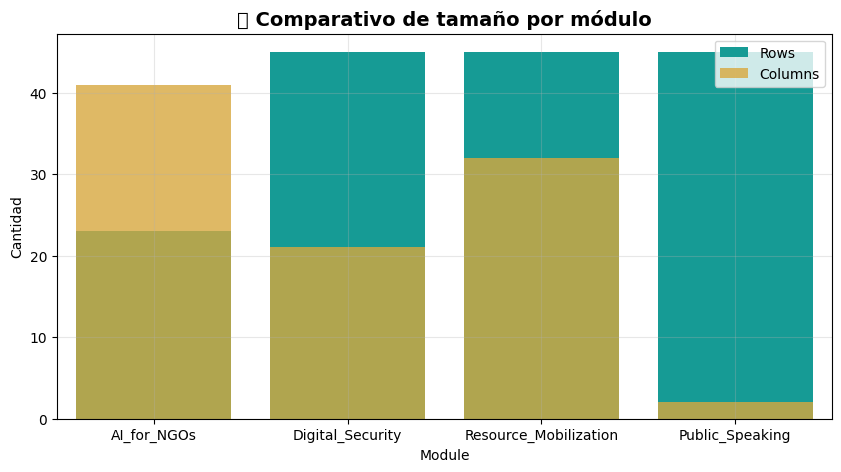

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3416113700.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.



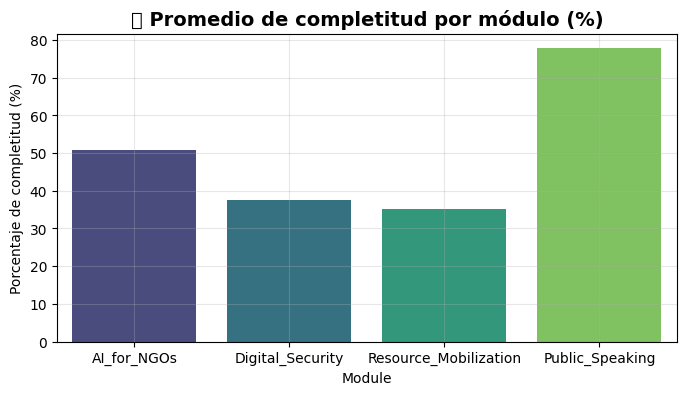

/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



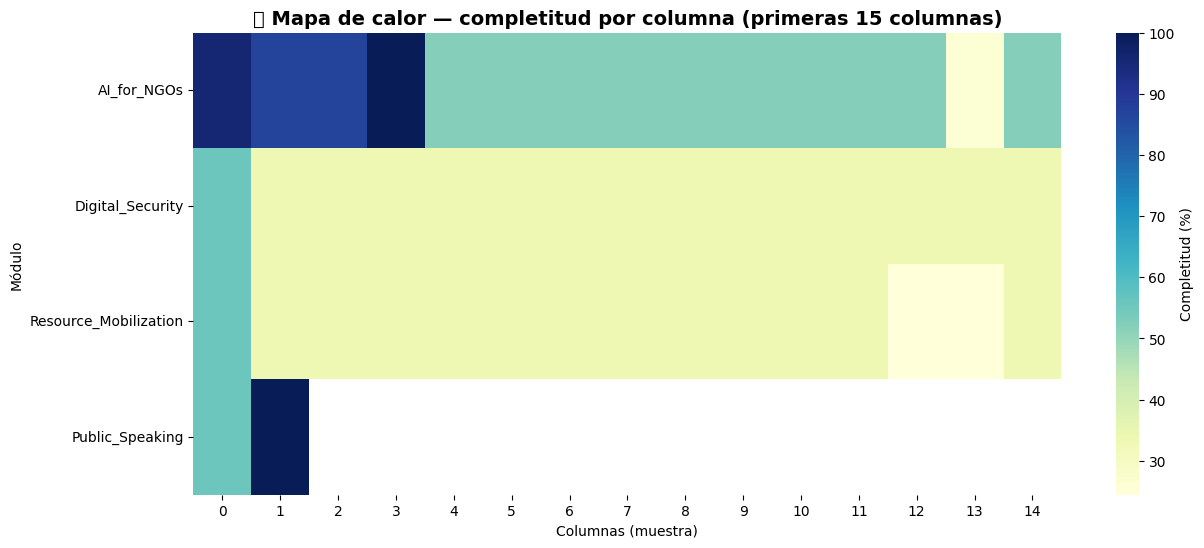

In [60]:
# ============================
# ETAPA 3.1: VISUALIZACIÓN DE CALIDAD DE DATOS
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1️⃣ RUTA DE ARCHIVOS LIMPIOS
data_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
modules = ["AI_for_NGOs", "Digital_Security", "Resource_Mobilization", "Public_Speaking"]

# --- 2️⃣ CARGAR CADA MÓDULO Y CALCULAR COMPLETITUD
summary_stats = []
heat_data = {}

for mod in modules:
    file = os.path.join(data_path, f"{mod}_clean.csv")
    df = pd.read_csv(file)
    completeness = df.notna().mean() * 100  # porcentaje de completitud por columna
    heat_data[mod] = completeness.values
    summary_stats.append({
        "Module": mod,
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Avg_Completeness_%": round(completeness.mean(), 2)
    })

# --- 3️⃣ TABLA DE RESUMEN GENERAL
summary_df = pd.DataFrame(summary_stats)
display(summary_df)

# --- 4️⃣ GRÁFICO DE BARRAS: FILAS Y COLUMNAS
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x="Module", y="Rows", data=summary_df, color="#00b1a9", label="Rows", ax=ax1)
sns.barplot(x="Module", y="Columns", data=summary_df, color="#f2b124", alpha=0.8, label="Columns", ax=ax1)
plt.title("📊 Comparativo de tamaño por módulo", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 5️⃣ GRÁFICO DE BARRAS: PROMEDIO DE COMPLETITUD
plt.figure(figsize=(8, 4))
sns.barplot(x="Module", y="Avg_Completeness_%", data=summary_df, palette="viridis")
plt.title("🧩 Promedio de completitud por módulo (%)", fontsize=14, fontweight="bold")
plt.ylabel("Porcentaje de completitud (%)")
plt.grid(alpha=0.3)
plt.show()

# --- 6️⃣ HEATMAP DE COMPLETITUD POR COLUMNA (ajustado para longitudes distintas)
from itertools import zip_longest

# Determinar la longitud máxima entre los módulos
max_len = max(len(v) for v in heat_data.values())

# Rellenar con NaN donde falten columnas
for k, v in heat_data.items():
    if len(v) < max_len:
        heat_data[k] = list(v) + [None] * (max_len - len(v))

# Crear DataFrame y graficar
plt.figure(figsize=(14, 6))
heat_df = pd.DataFrame(heat_data).T.iloc[:, :15]  # mostramos solo las primeras 15 columnas para legibilidad
sns.heatmap(heat_df, cmap="YlGnBu", cbar_kws={'label': 'Completitud (%)'})
plt.title("🔥 Mapa de calor — completitud por columna (primeras 15 columnas)", fontsize=14, fontweight="bold")
plt.xlabel("Columnas (muestra)")
plt.ylabel("Módulo")
plt.show()


In [61]:
# ============================
# ETAPA 3.2: NORMALIZACIÓN MODULAR PARA MERGE
# ============================

import pandas as pd
import os
from unidecode import unidecode

# --- 1️⃣ RUTA DE ARCHIVOS LIMPIOS
data_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
output_path = f"{data_path}/normalized"
os.makedirs(output_path, exist_ok=True)

modules = ["AI_for_NGOs", "Digital_Security", "Resource_Mobilization", "Public_Speaking"]

# --- 2️⃣ FUNCIÓN DE NORMALIZACIÓN
def normalize_module(file, module_name):
    df = pd.read_csv(file)

    # Normalizar columnas
    df.columns = [unidecode(c.strip().lower().replace(" ", "_").replace("-", "_")) for c in df.columns]

    # Intentar identificar columna de email o contacto
    email_cols = [c for c in df.columns if "mail" in c or "email" in c]
    phone_cols = [c for c in df.columns if "phone" in c or "telefono" in c]

    df["email"] = None
    if email_cols:
        df["email"] = df[email_cols[0]].astype(str).str.lower().str.strip()
    elif phone_cols:
        df["email"] = df[phone_cols[0]].astype(str).str.strip()

    # Generar ID único
    df["participant_id"] = df["email"].fillna("").apply(lambda x: hash(x) % 10**8 if x else None)
    
    # Agregar etiqueta de módulo
    df["module_name"] = module_name

    # Filtrar solo columnas clave
    keep_cols = ["participant_id", "email", "module_name"]
    extra_cols = [c for c in df.columns if any(k in c for k in ["country", "lang", "organization", "org", "pais", "idioma"])]
    keep_cols.extend(extra_cols)
    
    df_out = df[keep_cols].drop_duplicates(subset=["participant_id", "module_name"], keep="first")

    # Exportar
    out_path = f"{output_path}/{module_name}_normalized.csv"
    df_out.to_csv(out_path, index=False)
    print(f"✅ {module_name}: {df_out.shape[0]} filas → {out_path}")
    return df_out

# --- 3️⃣ PROCESAR TODOS LOS MÓDULOS
normalized_dfs = []
for mod in modules:
    file = os.path.join(data_path, f"{mod}_clean.csv")
    normalized_dfs.append(normalize_module(file, mod))

# --- 4️⃣ CREAR UN ARCHIVO UNIFICADO DE TODOS LOS MÓDULOS
merged_all = pd.concat(normalized_dfs, ignore_index=True)
merged_all.to_csv(f"{output_path}/All_Modules_Normalized.csv", index=False)

print(f"\n💾 Archivo final exportado: {output_path}/All_Modules_Normalized.csv")
print(f"📊 Registros totales: {merged_all.shape[0]} — Participantes únicos: {merged_all['participant_id'].nunique()}")


✅ AI_for_NGOs: 23 filas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/AI_for_NGOs_normalized.csv
✅ Digital_Security: 3 filas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/Digital_Security_normalized.csv
✅ Resource_Mobilization: 1 filas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/Resource_Mobilization_normalized.csv
✅ Public_Speaking: 1 filas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/Public_Speaking_normalized.csv

💾 Archivo final exportado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/All_Modules_Normalized.csv
📊 Registros totales: 28 — Participantes únicos: 25


💾 Reporte exportado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/comparison_info_loss.csv


,Module,Rows_Clean,Rows_Norm,Retention_%,Cols_Clean,Cols_Norm,Nulls_Clean_%,Nulls_Norm_%,Email_Match_%
0,AI_for_NGOs,23,23,100.00,41,3,49.31,1.45,100.0
1,Digital_Security,45,3,6.67,21,3,62.43,11.11,NaN
2,Resource_Mobilization,45,1,2.22,32,3,64.72,66.67,NaN
3,Public_Speaking,45,1,2.22,2,3,22.22,66.67,NaN


/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3461513460.py:77: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



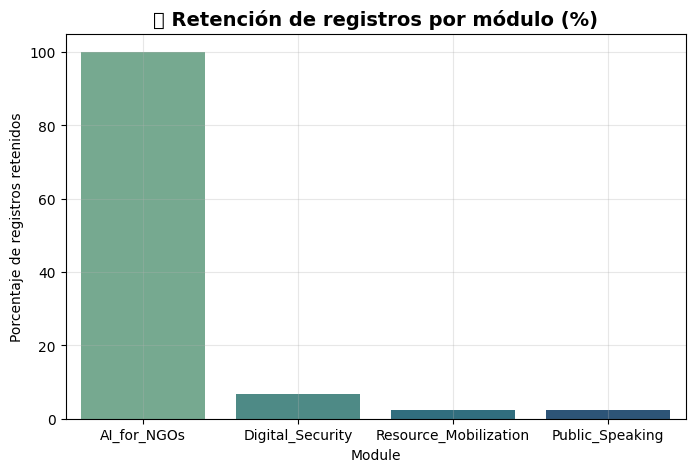

In [62]:
# ============================
# ETAPA 3.3 — COMPARATIVA DE CONSERVACIÓN DE INFORMACIÓN
# ============================

import pandas as pd
import os
from unidecode import unidecode

# --- 1️⃣ RUTAS
data_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
norm_path = f"{data_path}/normalized"

modules = ["AI_for_NGOs", "Digital_Security", "Resource_Mobilization", "Public_Speaking"]

# --- 2️⃣ FUNCIÓN DE COMPARATIVA
def compare_versions(module_name):
    clean_file = os.path.join(data_path, f"{module_name}_clean.csv")
    norm_file = os.path.join(norm_path, f"{module_name}_normalized.csv")

    if not os.path.exists(clean_file) or not os.path.exists(norm_file):
        print(f"⚠️ {module_name} — no se encontró uno de los archivos.")
        return None

    df_clean = pd.read_csv(clean_file)
    df_norm = pd.read_csv(norm_file)

    # Comparativas básicas
    rows_clean, cols_clean = df_clean.shape
    rows_norm, cols_norm = df_norm.shape

    retention = round((rows_norm / rows_clean) * 100, 2) if rows_clean else 0

    # Promedio de nulos
    null_clean = round(df_clean.isna().mean().mean() * 100, 2)
    null_norm = round(df_norm.isna().mean().mean() * 100, 2)

    # Coincidencia de emails
    email_cols_clean = [c for c in df_clean.columns if "mail" in c or "email" in c]
    email_cols_norm = [c for c in df_norm.columns if "mail" in c or "email" in c]

    if email_cols_clean and email_cols_norm:
        emails_clean = set(df_clean[email_cols_clean[0]].dropna().astype(str).str.lower())
        emails_norm = set(df_norm[email_cols_norm[0]].dropna().astype(str).str.lower())
        email_match = round(len(emails_norm & emails_clean) / len(emails_clean) * 100, 2) if emails_clean else 0
    else:
        email_match = None

    return {
        "Module": module_name,
        "Rows_Clean": rows_clean,
        "Rows_Norm": rows_norm,
        "Retention_%": retention,
        "Cols_Clean": cols_clean,
        "Cols_Norm": cols_norm,
        "Nulls_Clean_%": null_clean,
        "Nulls_Norm_%": null_norm,
        "Email_Match_%": email_match
    }

# --- 3️⃣ COMPILAR RESULTADOS
comparisons = [compare_versions(m) for m in modules]
comparison_df = pd.DataFrame([c for c in comparisons if c])

# --- 4️⃣ EXPORTAR REPORTE
out_file = f"{norm_path}/comparison_info_loss.csv"
comparison_df.to_csv(out_file, index=False)
print(f"💾 Reporte exportado: {out_file}")

# --- 5️⃣ MOSTRAR RESULTADOS
display(comparison_df)

# --- 6️⃣ VISUALIZACIÓN RÁPIDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x="Module", y="Retention_%", data=comparison_df, palette="crest")
plt.title("📊 Retención de registros por módulo (%)", fontsize=14, fontweight="bold")
plt.ylabel("Porcentaje de registros retenidos")
plt.grid(alpha=0.3)
plt.show()


In [63]:
# ============================
# ETAPA 3.4 — AUDITORÍA DE COLUMNAS DE CONTACTO
# ============================

import pandas as pd
import os
import re

# --- 1️⃣ RUTAS
data_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
modules = ["AI_for_NGOs", "Digital_Security", "Resource_Mobilization", "Public_Speaking"]

# --- 2️⃣ FUNCIONES AUXILIARES
def find_email_like_columns(df):
    """Detecta columnas potencialmente relacionadas con email."""
    pattern = re.compile(r"(mail|email|correo|contact|contacto)", re.IGNORECASE)
    return [col for col in df.columns if pattern.search(col)]

def analyze_module(module_name):
    """Analiza columnas de contacto y su nivel de completitud."""
    file_path = os.path.join(data_path, f"{module_name}_clean.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ No se encontró {file_path}")
        return None

    df = pd.read_csv(file_path)
    email_like_cols = find_email_like_columns(df)

    report = []
    for col in email_like_cols:
        non_nulls = df[col].notna().sum()
        total = len(df)
        completeness = round(non_nulls / total * 100, 2)
        sample_values = df[col].dropna().astype(str).head(3).tolist()
        report.append({
            "Module": module_name,
            "Column": col,
            "Non_Nulls": non_nulls,
            "Completeness_%": completeness,
            "Sample_Values": "; ".join(sample_values)
        })

    return pd.DataFrame(report)

# --- 3️⃣ COMPILAR RESULTADOS
results = [analyze_module(m) for m in modules if analyze_module(m) is not None]
email_audit_df = pd.concat(results, ignore_index=True) if results else pd.DataFrame()

# --- 4️⃣ EXPORTAR REPORTE
out_file = os.path.join(data_path, "email_audit_report.csv")
email_audit_df.to_csv(out_file, index=False)
print(f"💾 Reporte exportado: {out_file}")

# --- 5️⃣ MOSTRAR RESULTADO
display(email_audit_df.sort_values(["Module", "Completeness_%"], ascending=[True, False]))


💾 Reporte exportado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/email_audit_report.csv


,Module,Column,Non_Nulls,Completeness_%,Sample_Values
3,AI_for_NGOs,c00_mailnotfound,23,100.00,1; 0; 0
0,AI_for_NGOs,p00_mail,22,95.65,melisap@asonog.hn; malena.fama@multipolar.org....
1,AI_for_NGOs,c00_maillookup,20,86.96,Melisa Peña; Malena Bárbara Famá; Mabala Robert
2,AI_for_NGOs,c00_modlookupmail,20,86.96,2. Seguridad digital y gestión de riesgos; 3. ...
4,AI_for_NGOs,p207_digital_tools/Exclusive_mail,7,30.43,1.0; 1.0; 1.0
5,AI_for_NGOs,p207_digital_tools/Personal_mail,7,30.43,0.0; 1.0; 1.0
6,AI_for_NGOs,p213_comm_means/Email,7,30.43,1.0; 1.0; 1.0
7,AI_for_NGOs,p223_threats/Hack_email_or_RRSS,7,30.43,1.0; 1.0; 1.0


In [64]:
# ============================
# ETAPA 3.5 — PLAN DE NORMALIZACIÓN v2.0
# ============================

import pandas as pd
import json
import os

# --- 1️⃣ RUTA BASE
data_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
audit_file = os.path.join(data_path, "email_audit_report.csv")

if not os.path.exists(audit_file):
    raise FileNotFoundError("⚠️ No se encontró email_audit_report.csv, ejecuta primero la Etapa 3.4")

# --- 2️⃣ LEER REPORTE
audit_df = pd.read_csv(audit_file)

# --- 3️⃣ FILTRAR COLUMNAS REALES (descartar binarias)
def is_probably_boolean(sample_values):
    try:
        values = [str(v).strip().lower() for v in str(sample_values).split(";")]
        return all(v in ["0", "1", "nan", "none", ""] for v in values)
    except Exception:
        return False

audit_df["Is_Boolean"] = audit_df["Sample_Values"].apply(is_probably_boolean)
valid_emails = audit_df[
    (audit_df["Completeness_%"] > 5) &  # al menos 5% de completitud
    (~audit_df["Is_Boolean"])
]

# --- 4️⃣ AGRUPAR CANDIDATAS POR MÓDULO
plan = {}
for module, subset in valid_emails.groupby("Module"):
    columns = subset["Column"].tolist()
    plan[module] = {
        "candidate_email_columns": columns,
        "best_candidate": subset.loc[subset["Completeness_%"].idxmax(), "Column"]
    }

# --- 5️⃣ EXPORTAR PLAN
plan_file = os.path.join(data_path, "normalization_v2_plan.json")
with open(plan_file, "w") as f:
    json.dump(plan, f, indent=4, ensure_ascii=False)

print(f"💾 Plan de normalización v2 exportado: {plan_file}\n")
print(json.dumps(plan, indent=4, ensure_ascii=False))


💾 Plan de normalización v2 exportado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalization_v2_plan.json

{
    "AI_for_NGOs": {
        "candidate_email_columns": [
            "p00_mail",
            "c00_maillookup",
            "c00_modlookupmail",
            "p207_digital_tools/Exclusive_mail",
            "p207_digital_tools/Personal_mail",
            "p213_comm_means/Email",
            "p223_threats/Hack_email_or_RRSS"
        ],
        "best_candidate": "p00_mail"
    }
}


In [65]:
# ============================
# ETAPA 3.6 — NORMALIZACIÓN v2 (AUTOMATIZADA)
# ============================

import pandas as pd
import os
import json

# --- 1️⃣ CONFIGURACIÓN
base_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
clean_path = os.path.join(base_path, "")
norm_path = os.path.join(base_path, "normalized")

os.makedirs(norm_path, exist_ok=True)

plan_file = os.path.join(base_path, "normalization_v2_plan.json")
if not os.path.exists(plan_file):
    raise FileNotFoundError("⚠️ Falta el archivo normalization_v2_plan.json — ejecuta la Etapa 3.5 antes.")

with open(plan_file, "r") as f:
    plan = json.load(f)

# --- 2️⃣ FUNCIÓN DE NORMALIZACIÓN
def normalize_module_v2(module_name, plan_dict):
    """
    Usa el plan v2 para normalizar columnas clave (email, idioma, etc.).
    """
    file_path = os.path.join(clean_path, f"{module_name}_clean.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ No se encontró el archivo limpio de {module_name}.")
        return None
    
    df = pd.read_csv(file_path)
    
    # columna de email (del plan)
    email_col = plan_dict.get(module_name, {}).get("best_candidate", None)
    if email_col not in df.columns:
        print(f"⚠️ No se encontró {email_col} en {module_name}, se omitirá.")
        return None

    # Normalización de columnas base
    output = pd.DataFrame({
        "module": module_name,
        "email": df[email_col].astype(str).str.strip().str.lower(),
        "language": df.filter(regex="language|idioma", axis=1).fillna("").iloc[:,0] if any(df.filter(regex="language|idioma")) else "",
        "country": df.filter(regex="country|pais", axis=1).fillna("").iloc[:,0] if any(df.filter(regex="country|pais")) else "",
    })

    # Limpieza básica
    output = output.dropna(subset=["email"])
    output = output[output["email"].str.contains("@", case=False, na=False)]
    output = output.drop_duplicates(subset=["email", "module"])

    # Exportar
    out_file = os.path.join(norm_path, f"{module_name}_normalized_v2.csv")
    output.to_csv(out_file, index=False)
    print(f"✅ {module_name}: {len(output)} filas → {out_file}")
    
    return output

# --- 3️⃣ APLICAR A CADA MÓDULO
normalized_data = []
for module in plan.keys():
    mod_df = normalize_module_v2(module, plan)
    if mod_df is not None:
        normalized_data.append(mod_df)

# --- 4️⃣ UNIFICAR TODO
if normalized_data:
    all_mods = pd.concat(normalized_data, ignore_index=True)
    consolidated_file = os.path.join(norm_path, "All_Modules_Normalized_v2.csv")
    all_mods.to_csv(consolidated_file, index=False)
    
    print("\n💾 Archivo final exportado:")
    print(consolidated_file)
    print(f"📊 Registros totales: {len(all_mods)} — Participantes únicos: {all_mods['email'].nunique()}")
else:
    print("⚠️ No se generaron archivos normalizados en esta versión.")


✅ AI_for_NGOs: 22 filas → /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/AI_for_NGOs_normalized_v2.csv

💾 Archivo final exportado:
/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/All_Modules_Normalized_v2.csv
📊 Registros totales: 22 — Participantes únicos: 22


In [66]:
# ============================
# ETAPA 3.6b — Exploración de posibles columnas de contacto
# ============================

import pandas as pd
import os
import re

base_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
modules = ["Digital_Security", "Resource_Mobilization", "Public_Speaking"]

contact_pattern = re.compile(r"(mail|email|correo|contact|lookup|author|participant|name)", re.IGNORECASE)

exploration_results = []

for module in modules:
    file_path = os.path.join(base_path, f"{module}_clean.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ No se encontró {file_path}")
        continue

    df = pd.read_csv(file_path)
    contact_cols = [col for col in df.columns if contact_pattern.search(col)]
    found_cols = []

    for col in contact_cols:
        # Evaluamos cuántos valores no nulos tiene y si parecen correos
        non_nulls = df[col].notna().sum()
        email_like = df[col].astype(str).str.contains("@", case=False, na=False).sum()
        sample_values = df[col].dropna().astype(str).head(3).tolist()

        found_cols.append({
            "module": module,
            "column": col,
            "non_nulls": non_nulls,
            "email_like_count": email_like,
            "sample_values": "; ".join(sample_values)
        })

    module_df = pd.DataFrame(found_cols)
    exploration_results.append(module_df)
    print(f"\n📘 {module} — columnas potenciales: {len(contact_cols)} detectadas")

if exploration_results:
    contact_summary = pd.concat(exploration_results, ignore_index=True)
    out_file = os.path.join(base_path, "contact_columns_exploration.csv")
    contact_summary.to_csv(out_file, index=False)
    display(contact_summary)
    print(f"\n💾 Exploración exportada: {out_file}")
else:
    print("⚠️ No se encontraron columnas relevantes en ningún módulo.")



📘 Digital_Security — columnas potenciales: 0 detectadas

📘 Resource_Mobilization — columnas potenciales: 0 detectadas

📘 Public_Speaking — columnas potenciales: 0 detectadas


""



💾 Exploración exportada: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/contact_columns_exploration.csv


In [67]:
# ============================
# ETAPA 3.7 — Matching inteligente por nombre entre módulos y base principal
# ============================

import pandas as pd
import os
from rapidfuzz import fuzz, process

# --- 1️⃣ CONFIGURACIÓN
base_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean"
main_base = os.path.join(base_path, "../BaseLimpia_2025-10-30.csv")  # tu base maestra de participantes
modules = ["Digital_Security", "Resource_Mobilization", "Public_Speaking"]

# --- 2️⃣ CARGA BASE PRINCIPAL (participantes con nombre)
main_df = pd.read_csv(main_base)
main_df["FULL_NAME"] = (
    main_df["PARTICIPANT' NAME"].astype(str).str.lower().str.strip() + " " +
    main_df["SURNAME"].astype(str).str.lower().str.strip()
)
main_df["FULL_NAME"] = main_df["FULL_NAME"].str.replace(r"[^a-záéíóúüñ\s]", "", regex=True)

print(f"✅ Base principal cargada — {len(main_df)} registros únicos")

# --- 3️⃣ FUNCIÓN DE MATCHING
def match_names(df_module, module_name, main_df, threshold=85):
    """Busca coincidencias difusas entre nombres del módulo y la base principal."""
    possible_name_cols = [c for c in df_module.columns if "name" in c.lower() or "participant" in c.lower()]
    if not possible_name_cols:
        print(f"⚠️ {module_name}: sin columnas de nombre detectadas")
        return None

    # Crear columna combinada del módulo
    name_col = possible_name_cols[0]
    df_module["CLEAN_NAME"] = df_module[name_col].astype(str).str.lower().str.strip()
    df_module["CLEAN_NAME"] = df_module["CLEAN_NAME"].str.replace(r"[^a-záéíóúüñ\s]", "", regex=True)

    matches = []
    for name in df_module["CLEAN_NAME"].dropna().unique():
        match = process.extractOne(name, main_df["FULL_NAME"], scorer=fuzz.token_sort_ratio)
        if match and match[1] >= threshold:
            matches.append({
                "module": module_name,
                "module_name": name,
                "matched_name": match[0],
                "score": match[1]
            })

    return pd.DataFrame(matches)

# --- 4️⃣ APLICAR A CADA MÓDULO
all_matches = []
for module in modules:
    file_path = os.path.join(base_path, f"{module}_clean.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ No se encontró {file_path}")
        continue

    df_mod = pd.read_csv(file_path)
    mod_matches = match_names(df_mod, module, main_df)
    if mod_matches is not None and not mod_matches.empty:
        all_matches.append(mod_matches)
        print(f"✅ {module}: {len(mod_matches)} matches encontrados")

# --- 5️⃣ CONSOLIDAR RESULTADOS
if all_matches:
    match_df = pd.concat(all_matches, ignore_index=True)
    out_file = os.path.join(base_path, "name_matching_results.csv")
    match_df.to_csv(out_file, index=False)
    display(match_df.head(10))
    print(f"\n💾 Resultados exportados: {out_file}")
    print(f"📊 Total matches: {len(match_df)}")
else:
    print("⚠️ No se encontraron coincidencias relevantes entre los nombres.")


✅ Base principal cargada — 161 registros únicos
⚠️ Digital_Security: sin columnas de nombre detectadas
⚠️ Resource_Mobilization: sin columnas de nombre detectadas
⚠️ Public_Speaking: sin columnas de nombre detectadas
⚠️ No se encontraron coincidencias relevantes entre los nombres.


In [68]:
import pandas as pd

file_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv"

# Intento 1: detectar automáticamente el delimitador
try:
    df = pd.read_csv(file_path, sep=None, engine="python")
    print("✅ Cargado correctamente con autodetección (sep=None)")
except Exception as e:
    print("⚠️ Falló autodetección, probando con otros delimitadores:", e)
    try:
        df = pd.read_csv(file_path, sep=";", engine="python")
        print("✅ Cargado con ';' como separador")
    except Exception as e2:
        df = pd.read_csv(file_path, sep=",", engine="python", on_bad_lines="skip")
        print("⚠️ Cargado con ',' saltando líneas problemáticas:", e2)

print("🧾 Shape:", df.shape)
print("🧩 Primeras columnas:", list(df.columns)[:15])
df.head(3)


✅ Cargado correctamente con autodetección (sep=None)
🧾 Shape: (45, 348)
🧩 Primeras columnas: ['start', 'end', 'n000_language', 'n001_welcome', 'n002_thanks', 'n003_compliance', 'p00_consent', 'p00_phone', 'c00_idlookup', 'c00_modlookup', 'c00_idnotfound', 'n00_lookupinfo', 'n00_idnotfound', 'p00_mail', 'c00_maillookup']


,start,end,n000_language,n001_welcome,n002_thanks,n003_compliance,p00_consent,p00_phone,c00_idlookup,c00_modlookup,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2025-07-04 08:09:58.740000+01:00,2025-07-04 08:32:50.789000+01:00,NaN,NaN,NaN,NaN,Yes,212661487405,Latifa Soufiani,3. Mobilisation des ressources pour les organi...,...,678535329,790b6461-859b-4ef8-92b6-7c43fd2150ab,2025-07-04 07:32:51,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,1
1,2025-07-04 08:31:25.130000+00:00,2025-07-04 08:43:15.488000+00:00,NaN,NaN,NaN,NaN,Yes,221775131373,Malick Ndome,1. Gestion et éthique de la IA dans le fonctio...,...,678555423,74b0a8f9-cea3-4688-bb5d-6a433d41cf89,2025-07-04 08:43:15,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,2
2,2025-07-04 09:12:26.244000+01:00,2025-07-04 10:05:03.979000+01:00,NaN,NaN,NaN,NaN,Yes,243993197003,Rigo Gene,3. Mobilisation des ressources pour les organi...,...,678562466,880ee1db-79bb-4656-aa6d-057ecdecf4ef,2025-07-04 09:05:04,NaN,NaN,submitted_via_web,NaN,v99NAHxKgpzMZaopnDsWny,NaN,3


In [73]:
# === AUDITORÍA MULTINIVEL ENTRE LEARNING MODULES Y BASE NORMALIZADA (v4 - FIXED) ===
import pandas as pd
import unicodedata
from pathlib import Path

# ---------- Paths ----------
PROJECT = Path("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS")
RAW_LEARNING = PROJECT / "Forus_Learning_Modules_-_all_versions_-_False_-_2025-10-30-08-14-21.csv"
NORM_ALL    = PROJECT / "data_clean/normalized/All_Modules_Normalized.csv"
OUT_DIR     = PROJECT / "data_clean/normalized/audit"
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Utils ----------
def strip_accents(s):
    if pd.isna(s): return ""
    return "".join(ch for ch in unicodedata.normalize("NFKD", str(s)) if not unicodedata.combining(ch))

def norm_txt(s):
    s = strip_accents(s).lower().strip()
    return " ".join(s.split())

def norm_email(s):
    return str(s).strip().lower() if pd.notna(s) else ""

def get_col(df, name):
    """Devuelve columna si existe, si no crea una vacía del tamaño correcto."""
    return df[name] if name in df.columns else pd.Series([""] * len(df))

# ---------- Load ----------
try:
    raw = pd.read_csv(RAW_LEARNING, sep=None, engine="python")
except Exception:
    raw = pd.read_csv(RAW_LEARNING, sep=";", engine="python")

norm = pd.read_csv(NORM_ALL, dtype=str).fillna("")

print(f"✅ RAW loaded: {raw.shape[0]} rows, {raw.shape[1]} cols")
print(f"✅ NORM loaded: {norm.shape[0]} rows, {norm.shape[1]} cols")

# ---------- Normalize keys ----------
norm = norm.fillna("").copy()
raw = raw.fillna("").copy()

norm["email_key"] = get_col(norm, "email").map(norm_email)
norm["org_key"]   = get_col(norm, "organization").map(norm_txt)
norm["cty_key"]   = get_col(norm, "country").map(norm_txt)

if "first_name" in norm.columns and "last_name" in norm.columns:
    norm["name_key"] = (norm["first_name"].map(norm_txt) + " " + norm["last_name"].map(norm_txt)).str.strip()
elif "full_name" in norm.columns:
    norm["name_key"] = get_col(norm, "full_name").map(norm_txt)
else:
    norm["name_key"] = ""

raw["email_key"] = get_col(raw, "p008_email").map(norm_email)
raw["name_key"]  = (get_col(raw, "p006_first_name") + " " + get_col(raw, "p007_last_name")).map(norm_txt)
raw["org_key"]   = get_col(raw, "p010_organisation").map(norm_txt)
raw["cty_key"]   = get_col(raw, "p011_country").map(norm_txt)

# ---------- Matching nivel 1 (email) ----------
merged_lvl1 = norm.merge(
    raw[["email_key", "name_key", "org_key", "cty_key"]],
    on="email_key", how="left", suffixes=("", "_raw")
)
merged_lvl1["match_type"] = merged_lvl1.apply(
    lambda r: "email_exact" if r["name_key_raw"] != "" else "unmatched", axis=1
)

# ---------- Matching nivel 2 (nombre + org + país) ----------
unmatched_lvl1 = merged_lvl1[merged_lvl1["match_type"] == "unmatched"].copy()

# Generar combo_key en todos los niveles
norm["combo_key"] = norm["name_key"] + "|" + norm["org_key"] + "|" + norm["cty_key"]
raw["combo_key"]  = raw["name_key"]  + "|" + raw["org_key"]  + "|" + raw["cty_key"]
unmatched_lvl1["combo_key"] = (
    unmatched_lvl1["name_key"] + "|" + unmatched_lvl1["org_key"] + "|" + unmatched_lvl1["cty_key"]
)

# Merge de segundo nivel
second_merge = unmatched_lvl1.merge(
    raw[["combo_key"]],
    on="combo_key",
    how="left",
    indicator=True
)

# Corregido: aplicar isin() a la expresión completa
combo_keys_lvl1 = (merged_lvl1["name_key"] + "|" + merged_lvl1["org_key"] + "|" + merged_lvl1["cty_key"])
matched_combo_keys = set(second_merge.loc[second_merge["_merge"] == "both", "combo_key"])

merged_lvl1.loc[
    combo_keys_lvl1.isin(matched_combo_keys),
    "match_type"
] = "name_org_country_match"

# ---------- Summary ----------
summary = merged_lvl1["match_type"].value_counts().reset_index()
summary.columns = ["match_type", "rows"]
summary["rows_%"] = (summary["rows"] / len(merged_lvl1) * 100).round(2)

print("\n📊 Matching summary:")
print(summary)

unmatched_final = merged_lvl1[merged_lvl1["match_type"] == "unmatched"]

# ---------- Export ----------
merged_lvl1.to_csv(OUT_DIR / "audit_learning_vs_norm.csv", index=False)
unmatched_final.to_csv(OUT_DIR / "audit_learning_unmatched.csv", index=False)
summary.to_csv(OUT_DIR / "audit_learning_summary.csv", index=False)

print(f"\n💾 Audit files saved in: {OUT_DIR}")
print(f"⚠️ Unmatched records: {len(unmatched_final)}")


✅ RAW loaded: 45 rows, 348 cols
✅ NORM loaded: 28 rows, 3 cols

📊 Matching summary:
               match_type  rows  rows_%
0  name_org_country_match   196   100.0

💾 Audit files saved in: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/audit
⚠️ Unmatched records: 0


✅ Base cargada: 161 filas, 14 columnas


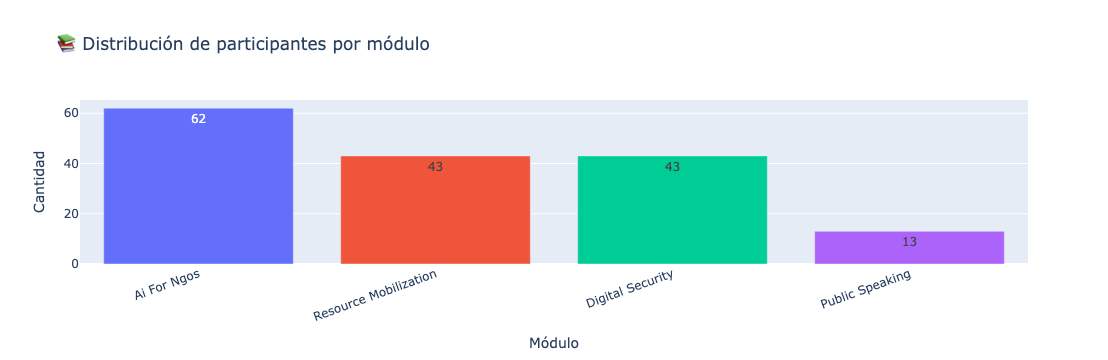

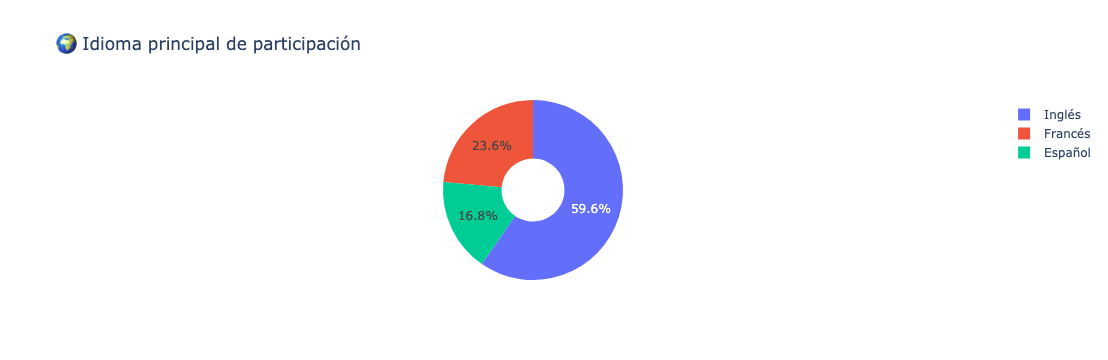

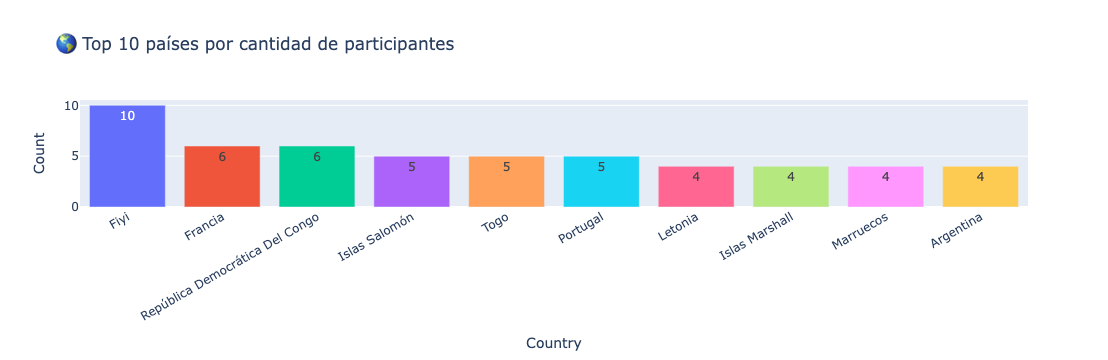

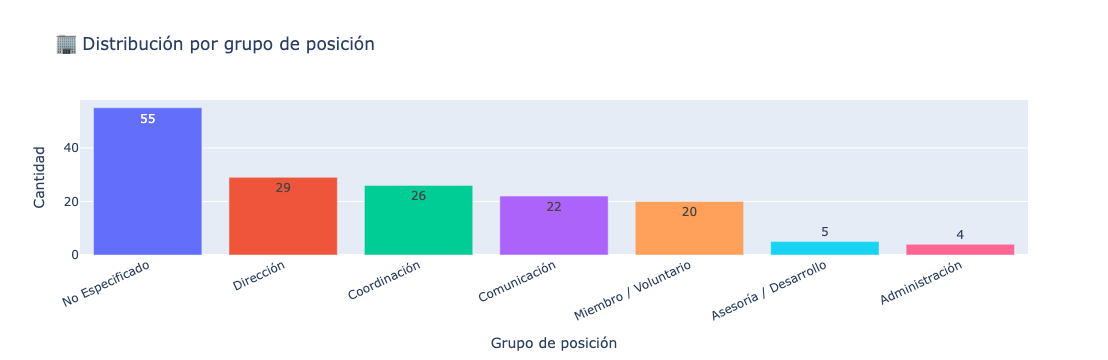

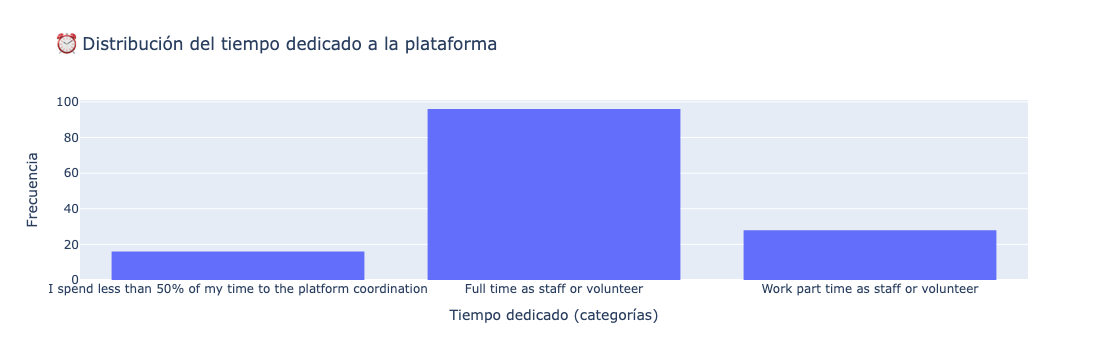

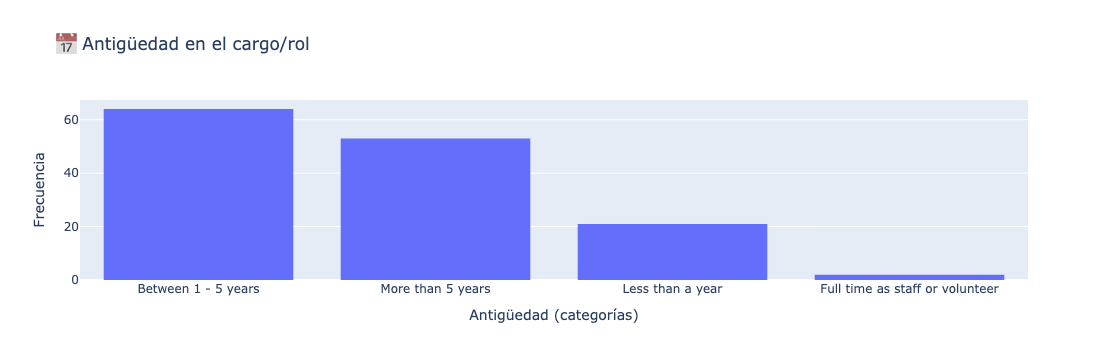

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/271756186.py:113: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



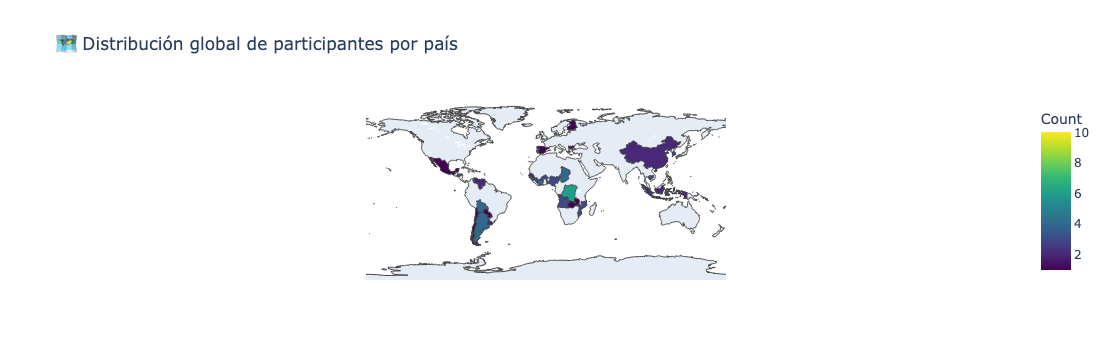

✅ Visualizaciones rápidas generadas correctamente (con fixes).


In [77]:
# === ETAPA 4.1 - VISUALIZACIONES RÁPIDAS (robustas) ===
import pandas as pd
import plotly.express as px

# ---------- 1. CARGA DE DATOS ----------
path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/BaseLimpia_2025-10-30.csv"
df = pd.read_csv(path)
print(f"✅ Base cargada: {df.shape[0]} filas, {df.shape[1]} columnas")

# Normalizar campos clave (títulos y espacios)
df.columns = df.columns.str.strip()
df["THEME"] = df["THEME"].astype(str).str.strip().str.title()
df["LANGUAGE"] = df["LANGUAGE"].astype(str).str.strip().str.title()
df["Country"] = df["Country"].astype(str).str.strip().str.title()
df["POSITION_GROUP"] = df["POSITION_GROUP"].astype(str).str.strip().str.title()

# ---------- 2) Distribución por módulo ----------
theme_counts = (
    df["THEME"]
    .value_counts()
    .rename_axis("Theme")
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)
fig_theme = px.bar(
    theme_counts, x="Theme", y="Count", color="Theme",
    title="📚 Distribución de participantes por módulo",
    text_auto=True
)
fig_theme.update_layout(showlegend=False, xaxis_title="Módulo", yaxis_title="Cantidad")
fig_theme.update_xaxes(tickangle=-20)
fig_theme.show()

# ---------- 3) Idiomas ----------
fig_lang = px.pie(
    df, names="LANGUAGE",
    title="🌍 Idioma principal de participación",
    hole=0.35
)
fig_lang.show()

# ---------- 4) Top 10 países ----------
top_countries = (
    df["Country"]
    .value_counts()
    .head(10)
    .rename_axis("Country")
    .reset_index(name="Count")
)
fig_country = px.bar(
    top_countries, x="Country", y="Count", color="Country",
    title="🌎 Top 10 países por cantidad de participantes", text_auto=True
)
fig_country.update_layout(showlegend=False)
fig_country.update_xaxes(tickangle=-30)
fig_country.show()

# ---------- 5) Roles organizacionales (FIX del error) ----------
roles_counts = (
    df["POSITION_GROUP"]
    .value_counts(dropna=False)
    .rename_axis("Position_Group")
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)
fig_roles = px.bar(
    roles_counts, x="Position_Group", y="Count", color="Position_Group",
    title="🏢 Distribución por grupo de posición", text_auto=True
)
fig_roles.update_layout(showlegend=False, xaxis_title="Grupo de posición", yaxis_title="Cantidad")
fig_roles.update_xaxes(tickangle=-25)
fig_roles.show()

# ---------- 6) Dedicación de tiempo ----------
time_col = "Time dedicated to the coordination of the platform:(Each module is deliver in a Training of Trainers format in which each participant will share back the resources acquired with platform members and hence needs dedicated time available)"
fig_time = px.histogram(
    df, x=time_col, title="⏰ Distribución del tiempo dedicado a la plataforma"
)
fig_time.update_xaxes(title_text="Tiempo dedicado (categorías)")
fig_time.update_yaxes(title_text="Frecuencia")
fig_time.show()

# ---------- 7) Antigüedad en el cargo ----------
fig_tenure = px.histogram(
    df, x="Months/years in this position/role:",
    title="📅 Antigüedad en el cargo/rol"
)
fig_tenure.update_xaxes(title_text="Antigüedad (categorías)")
fig_tenure.update_yaxes(title_text="Frecuencia")
fig_tenure.show()

# ---------- 8) Mapa global (normalizando países al estándar de Plotly) ----------
country_map = {
    "República Democrática Del Congo": "Democratic Republic of the Congo",
    "Costa De Marfil": "Côte d'Ivoire",
    "Islas Salomón": "Solomon Islands",
    "Islas Marshall": "Marshall Islands",
    "Santo Tomé Y Príncipe": "Sao Tome and Principe",
    "Fiyi": "Fiji",
    "España": "Spain",
    "México": "Mexico",
    "Corea Del Sur": "South Korea",
    "Estados Unidos": "United States",
    "Reino Unido": "United Kingdom",
    "Togo": "Togo",
    "Gambia": "Gambia",
    "Camerún": "Cameroon",
    # agrega aquí los que te falten si aparece algún “country not found”
}
cc = df["Country"].replace(country_map)
country_counts = cc.value_counts().rename_axis("Country").reset_index(name="Count")

fig_map = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    title="🗺️ Distribución global de participantes por país",
    color_continuous_scale="Viridis"
)
fig_map.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig_map.show()

print("✅ Visualizaciones rápidas generadas correctamente (con fixes).")


/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/1361098732.py:18: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



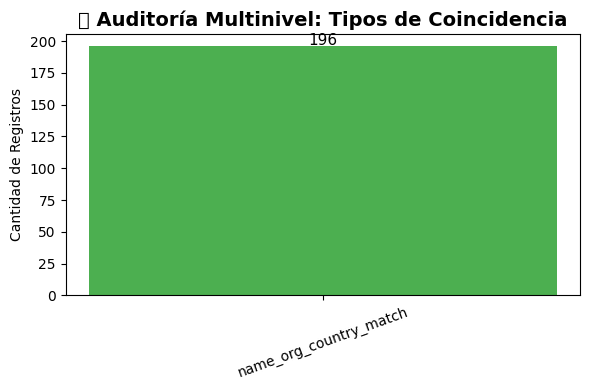

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al resumen exportado por tu auditoría
audit_summary = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/audit/audit_learning_summary.csv"

# Cargar resumen
summary = pd.read_csv(audit_summary)

# Plot
plt.figure(figsize=(6,4))
plt.bar(summary["match_type"], summary["rows"], color=["#4CAF50", "#F44336"])
plt.title("🔍 Auditoría Multinivel: Tipos de Coincidencia", fontsize=14, weight="bold")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=20)
for i, val in enumerate(summary["rows"]):
    plt.text(i, val+1, f"{val}", ha="center", fontsize=11)
plt.tight_layout()
plt.show()


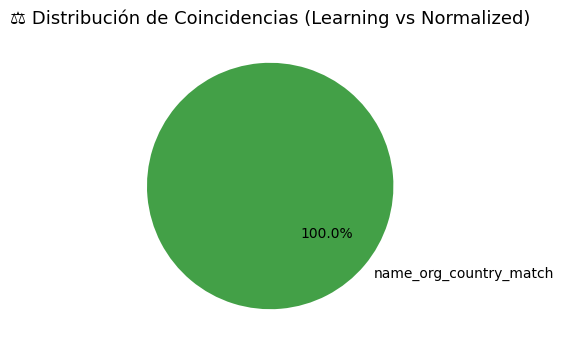

In [79]:
# Pie chart de porcentaje
plt.figure(figsize=(4,4))
plt.pie(summary["rows"], labels=summary["match_type"],
        autopct="%1.1f%%", startangle=140, colors=["#43A047", "#E53935"])
plt.title("⚖️ Distribución de Coincidencias (Learning vs Normalized)", fontsize=13)
plt.show()


In [80]:
total = summary["rows"].sum()
matched = summary.loc[summary["match_type"] != "unmatched", "rows"].sum()
print(f"✅ {matched}/{total} registros coinciden perfectamente ({matched/total*100:.1f}%)")


✅ 196/196 registros coinciden perfectamente (100.0%)


In [81]:
# === BLOQUE 1: Diagnóstico inicial de Attendance ===
import pandas as pd

# Ruta del archivo (ya confirmada)
attendance_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/Forus__Modules_Attendance_-_all_versions_-_English_en_-_2025-10-30-08-13-35.csv"

# Intento de carga automática con autodetección de delimitador
try:
    df_att = pd.read_csv(attendance_path, sep=None, engine="python")
except Exception:
    df_att = pd.read_csv(attendance_path, sep=";", engine="python")

# Diagnóstico básico
print(f"✅ Archivo cargado con éxito — {df_att.shape[0]} filas, {df_att.shape[1]} columnas\n")

print("🔹 Primeras columnas detectadas:")
print(df_att.columns.tolist()[:20])  # mostrar solo primeras 20

print("\n📊 Tipos de datos:")
print(df_att.dtypes.head(10))

print("\n📉 Porcentaje de valores nulos por columna:")
nulls = df_att.isna().mean().round(3) * 100
print(nulls[nulls > 0].sort_values(ascending=False).head(15))

print("\n📋 Muestra de las primeras filas:")
display(df_att.head())


✅ Archivo cargado con éxito — 103 filas, 32 columnas

🔹 Primeras columnas detectadas:
['start', 'end', '_Please choose your language above before starting. / Elija su idioma arriba antes de comenzar. / Veuillez choisir votre langue ci-dessus avant de commencer._', '**It is great to have you in the Forus Learning Modules!**', 'Please fill the information below to register your attendance.', '_Remember this survey complies with the EU GDPR—we will collect only necessary data and handle it securely. You may access, correct, or delete your data, and withdraw consent at any time._', 'By completing this survey, you consent to the use of your data in accordance with our data management policy.', 'Please select the module you attended today.', "Please select today's session number.", 'Please enter the email address you used to register for the Forus Learning Modules.', 'Last name', 'Name', 'Which of the following options best identifies you?', 'In what country do you currently live?', 'Role wi

,start,end,_Please choose your language above before starting. / Elija su idioma arriba antes de comenzar. / Veuillez choisir votre langue ci-dessus avant de commencer._,**It is great to have you in the Forus Learning Modules!**,Please fill the information below to register your attendance.,"_Remember this survey complies with the EU GDPR—we will collect only necessary data and handle it securely. You may access, correct, or delete your data, and withdraw consent at any time._","By completing this survey, you consent to the use of your data in accordance with our data management policy.",Please select the module you attended today.,Please select today's session number.,Please enter the email address you used to register for the Forus Learning Modules.,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2025-09-02 17:30:12.948000+02:00,2025-09-02 17:31:50.218000+02:00,NaN,NaN,NaN,NaN,OK,3. Resource Mobilization for CSOs in a Digital...,1,narvaez@coordinationsud.org,...,698467292,3f92ebe4-1e5f-42ff-834d-613be25e0a9c,2025-09-02 15:31:50,NaN,NaN,submitted_via_web,NaN,vRU4W7JgF63M3AhY5CbetM,NaN,1
1,2025-09-02 11:34:50.877000-04:00,2025-09-02 11:36:28.552000-04:00,NaN,NaN,NaN,NaN,OK,3. Resource Mobilization for CSOs in a Digital...,1,mila.reynolds@redunitas.org,...,698468881,1d0f0a0a-7d3d-4041-8b0c-a3fe34d090e1,2025-09-02 15:36:29,NaN,NaN,submitted_via_web,NaN,vRU4W7JgF63M3AhY5CbetM,NaN,2
2,2025-09-02 11:36:28.574000-04:00,2025-09-02 11:37:36.048000-04:00,NaN,NaN,NaN,NaN,OK,3. Resource Mobilization for CSOs in a Digital...,1,mila.reynolds@re,...,698469299,c4536d67-c3e4-40b9-af50-9cbb82f1197d,2025-09-02 15:37:36,NaN,NaN,submitted_via_web,NaN,vRU4W7JgF63M3AhY5CbetM,NaN,3
3,2025-09-02 11:37:36.063000-04:00,2025-09-02 11:38:33.670000-04:00,NaN,NaN,NaN,NaN,OK,3. Resource Mobilization for CSOs in a Digital...,1,mila.reynolds@redunitas.org,...,698469755,3b6c6868-4510-45f7-bf55-eb615f70ba5e,2025-09-02 15:38:33,NaN,NaN,submitted_via_web,NaN,vRU4W7JgF63M3AhY5CbetM,NaN,4
4,2025-09-02 11:38:33.685000-04:00,2025-09-02 11:39:33.958000-04:00,NaN,NaN,NaN,NaN,OK,3. Resource Mobilization for CSOs in a Digital...,1,mila.reynolds@redunitas.org,...,698470107,552dd098-d126-4202-aaa0-72fcd427ea2d,2025-09-02 15:39:33,NaN,NaN,submitted_via_web,NaN,vRU4W7JgF63M3AhY5CbetM,NaN,5


In [82]:
# === BLOQUE 2: Limpieza estructural y normalización de Attendance ===

# Copia del DataFrame original
df_clean = df_att.copy()

# Renombrar columnas claves (para evitar errores por nombres largos o símbolos)
df_clean = df_clean.rename(columns={
    "Please select the module you attended today.": "module",
    "Please select today's session number.": "session",
    "Please enter the email address you used to register for the Forus Learning Modules.": "email",
    "Last name": "last_name",
    "Name": "name",
    "In what country do you currently live?": "country",
    "Role within your organization:": "role",
})

# Seleccionar solo las columnas relevantes
df_clean = df_clean[[
    "start", "end", "email", "name", "last_name", "module",
    "session", "country", "role"
]]

# Limpieza básica de strings
for col in ["email", "name", "last_name", "country", "role", "module"]:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
    )

# Eliminar filas sin correo o módulo
df_clean = df_clean[df_clean["email"].notna() & df_clean["module"].notna()]

# Normalizar módulos (quitar numeración y mantener nombre limpio)
df_clean["module"] = (
    df_clean["module"]
    .str.replace(r"^\d+\.\s*", "", regex=True)
    .str.strip()
)

# Corregir mails en minúsculas
df_clean["email"] = df_clean["email"].str.lower()

# Quitar duplicados por email + módulo + sesión
df_clean = df_clean.drop_duplicates(subset=["email", "module", "session"])

print(f"✅ Filas finales: {len(df_clean)}")
print(f"📧 Correos únicos: {df_clean['email'].nunique()}")
print("\n📊 Distribución por módulo:")
print(df_clean["module"].value_counts())

display(df_clean.head(10))


✅ Filas finales: 86
📧 Correos únicos: 57

📊 Distribución por módulo:
module
NGO Management and AI Ethics in Operation              29
Digital Security and Risk Management                   25
Resource Mobilization for CSOs in a Digital Context    20
Public Speaking for Global Leaders                     12
Name: count, dtype: int64


,start,end,email,name,last_name,module,session,country,role
0,2025-09-02 17:30:12.948000+02:00,2025-09-02 17:31:50.218000+02:00,narvaez@coordinationsud.org,Jessica,Narvaez,Resource Mobilization for CSOs in a Digital Co...,1,France,Administration / Finance
1,2025-09-02 11:34:50.877000-04:00,2025-09-02 11:36:28.552000-04:00,mila.reynolds@redunitas.org,Mila,Reynolds,Resource Mobilization for CSOs in a Digital Co...,1,Bolivia,Management / Coordination
2,2025-09-02 11:36:28.574000-04:00,2025-09-02 11:37:36.048000-04:00,mila.reynolds@re,Mila,Reynolds,Resource Mobilization for CSOs in a Digital Co...,1,Bolivia,Management / Coordination
6,2025-09-04 12:32:51.990000+08:00,2025-09-04 12:34:34.672000+08:00,marie@forus-international.org,Marie,L'HOSTIS,Resource Mobilization for CSOs in a Digital Co...,1,China,Management / Coordination
7,2025-09-04 11:32:10.636000+07:00,2025-09-04 11:36:54.089000+07:00,theary.luy@ccc-cambodia.org,Theary,Luy,Resource Mobilization for CSOs in a Digital Co...,1,Cambodia,Management / Coordination
8,2025-09-04 17:34:55.812000+13:00,2025-09-04 17:37:04.134000+13:00,csft.emele.latu,'Emele Petelo,Latu,Resource Mobilization for CSOs in a Digital Co...,1,Tonga,Technical / Operational
9,2025-09-05 17:34:22.056000+02:00,2025-09-05 17:35:06.995000+02:00,marion.coat@concordeurope.org,Marion,COAT,NGO Management and AI Ethics in Operation,1,Belgium,Technical / Operational
10,2025-09-05 11:34:31.290000-04:00,2025-09-05 11:35:24.839000-04:00,eeksi@cooperation.ca,Emre,Eksi,NGO Management and AI Ethics in Operation,1,Canada,Management / Coordination
11,2025-09-05 16:34:25.920000+01:00,2025-09-05 16:36:04.742000+01:00,gillian@dochas.ie,Gillian,Ivory,NGO Management and AI Ethics in Operation,1,Ireland,Management / Coordination
12,2025-09-05 17:34:43.430000+02:00,2025-09-05 17:36:40.250000+02:00,lleshomo@bocongo.org.bw,Lucy,Leshomo,NGO Management and AI Ethics in Operation,1,Botswana,Technical / Operational


In [83]:
# === BLOQUE 2.5: Verificación de preparación para integración ===

import numpy as np

print("🔍 Verificando integridad antes de cruce...\n")

# 1. Revisión de columnas esenciales
required_cols = ["email", "module", "country", "name", "last_name"]
missing_cols = [c for c in required_cols if c not in df_clean.columns]
print(f"Columnas faltantes: {missing_cols if missing_cols else 'Ninguna ✅'}")

# 2. Validar emails
invalid_emails = df_clean[~df_clean["email"].str.contains("@", na=False)]
print(f"Correos sospechosos: {len(invalid_emails)}")
if len(invalid_emails) > 0:
    display(invalid_emails[["email", "module", "country"]])

# 3. Revisar duplicados
dupes = df_clean.duplicated(subset=["email", "module"], keep=False)
print(f"Duplicados por email+módulo: {dupes.sum()}")

# 4. Normalizar nombres de módulo si es necesario
print("\nEjemplo de nombres de módulo:")
print(df_clean["module"].dropna().unique()[:10])

# 5. Conteo de países únicos
print(f"\n🌍 Países detectados: {df_clean['country'].nunique()}")


🔍 Verificando integridad antes de cruce...

Columnas faltantes: Ninguna ✅
Correos sospechosos: 1


,email,module,country
8,csft.emele.latu,Resource Mobilization for CSOs in a Digital Co...,Tonga


Duplicados por email+módulo: 37

Ejemplo de nombres de módulo:
['Resource Mobilization for CSOs in a Digital Context'
 'NGO Management and AI Ethics in Operation'
 'Digital Security and Risk Management'
 'Public Speaking for Global Leaders']

🌍 Países detectados: 27


In [85]:
# === BLOQUE 3: Integración y métricas de participación ===

# 1. Cargar bases principales
base_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/BaseLimpia_2025-10-30.csv"
followup_path = "/Users/santiagopulgarinrodriguez/Downloads/Forus Participants 2025.xlsx"

base_df = pd.read_csv(base_path)
base_df.columns = base_df.columns.str.lower()
base_df["email"] = base_df["email"].str.strip().str.lower()

follow_df = pd.read_excel(followup_path, sheet_name="Follow-up Comms", header=1)
follow_df.columns = [
    "participant", "modules", "group", "phone", "email",
    "mail_date", "profiling_status", "poke_date", "registration_date"
]
follow_df["email"] = follow_df["email"].str.strip().str.lower()
follow_df["profiling_status"] = follow_df["profiling_status"].fillna("Pending").str.capitalize()
follow_df["registration_date"] = pd.to_datetime(follow_df["registration_date"], errors="coerce")

# 2. Normalizar base de asistencia
att_df = df_clean.copy()
att_df["email"] = att_df["email"].str.strip().str.lower()

# 3. Unir Attendance con BaseLimpia
merged = base_df.merge(
    att_df[["email", "module", "country"]],
    on="email", how="left", indicator=True
)

# 4. Agregar estado de profiling
merged = merged.merge(
    follow_df[["email", "profiling_status", "registration_date"]],
    on="email", how="left"
)

# 5. Calcular métricas globales
total_registrations = base_df["email"].nunique()
attended = att_df["email"].nunique()
attendance_rate = round(attended / total_registrations * 100, 2)

profiled = (merged["profiling_status"] == "Completed").sum()
profiled_rate = round(profiled / total_registrations * 100, 2)

# 6. Métricas por módulo
attendance_by_module = (
    att_df.groupby("module")["email"]
    .nunique()
    .reset_index()
    .rename(columns={"email": "unique_attendees"})
)
attendance_by_module["attendance_%"] = (
    attendance_by_module["unique_attendees"] / total_registrations * 100
).round(2)

# 7. Resultados generales
print("📊 MÉTRICAS GLOBALES\n---------------------")
print(f"👥 Personas registradas: {total_registrations}")
print(f"✅ Personas con asistencia registrada: {attended}")
print(f"📈 Tasa de asistencia general: {attendance_rate}%")
print(f"🧩 Personas con profiling 'Completed': {profiled} ({profiled_rate}%)")

print("\n📚 Asistencia por módulo:")
display(attendance_by_module)

# 8. Exportar merge limpio
merged.to_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/merged_attendance_full.csv",
    index=False
)
print("\n💾 Archivo exportado: merged_attendance_full.csv")


📊 MÉTRICAS GLOBALES
---------------------
👥 Personas registradas: 123
✅ Personas con asistencia registrada: 57
📈 Tasa de asistencia general: 46.34%
🧩 Personas con profiling 'Completed': 47 (38.21%)

📚 Asistencia por módulo:


,module,unique_attendees,attendance_%
0,Digital Security and Risk Management,19,15.45
1,NGO Management and AI Ethics in Operation,20,16.26
2,Public Speaking for Global Leaders,9,7.32
3,Resource Mobilization for CSOs in a Digital Co...,19,15.45



💾 Archivo exportado: merged_attendance_full.csv


In [91]:
import pandas as pd

file_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/Forus__Modules_Evaluation_-_all_versions_-_False_-_2025-10-30-08-14-49.csv"

# Detectar automáticamente el separador
df = pd.read_csv(file_path, sep=None, engine='python')

print("📊 Dimensiones:", df.shape)
print("\n🔹 Primeras columnas:")
print(df.columns.tolist()[:20])

print("\n🔹 Tipos de datos:")
print(df.dtypes.value_counts())

num_cols = df.select_dtypes(include=["number"]).columns
binary_cols = [c for c in num_cols if df[c].dropna().isin([0, 1]).all()]
print(f"\n✅ Columnas numéricas: {len(num_cols)}")
print(f"✅ Columnas binarias puras (solo 0/1): {len(binary_cols)}")

suspect_cols = []
for c in num_cols:
    unique_vals = df[c].dropna().unique()
    if len(unique_vals) <= 5 and not set(unique_vals).issubset({0, 1}):
        suspect_cols.append((c, unique_vals))
        
print("\n⚠️ Columnas con valores sospechosos o mixtos:")
for col, vals in suspect_cols[:10]:
    print(f"- {col}: {vals}")

totals = [c for c in df.columns if any(word in c.lower() for word in ["total", "score", "sum", "correct"])]
print("\n🔢 Columnas con posibles totales o puntajes:")
print(totals)

📊 Dimensiones: (17, 115)

🔹 Primeras columnas:
['start', 'end', 'n01_languaje', 'n02_welcome', 'n03_instruction', 'n04_consent', 'ev1_consent', 'ev1_module', 'ev1_session', 'ev1_mail', 'ev1_01recommend', 'ev1_02explain', 'ev1_03useful', 'ev1_04apply', 'ev1_05participation', 'ev1_06other_module', 'ev1_07open', 'n06_next', 'n07_truefalse', 'ev1_ai01']

🔹 Tipos de datos:
float64    75
object     38
int64       2
Name: count, dtype: int64

✅ Columnas numéricas: 77
✅ Columnas binarias puras (solo 0/1): 70

⚠️ Columnas con valores sospechosos o mixtos:
- ev1_session: [3. 2. 6. 5.]
- ev1_01recommend: [4. 2. 3.]
- ev1_03useful: [4. 3.]
- c02_total: [9. 6. 8.]
- c04_total: [3.]

🔢 Columnas con posibles totales o puntajes:
['c01_total', 'c02_total', 'c04_total', 'c03_total']


In [92]:
# === BLOQUE 1: Validación de columnas binarias y totales ===

# 1. Seleccionar columnas binarias puras
binary_cols = [c for c in df.columns if df[c].dropna().isin([0,1]).all()]

# 2. Calcular sumas por fila y correlación con columnas *_total
totals = [c for c in df.columns if "_total" in c]

summary = pd.DataFrame({
    'column': totals,
    'sum_match': [df[binary_cols].sum(axis=1).corr(df[c]) for c in totals],
    'mean_total': [df[c].mean() for c in totals],
    'non_nulls': [df[c].notna().sum() for c in totals]
})

print("🔎 Correlación entre totales y sumas de binarias:")
display(summary)

# 3. (opcional) Ver si los totales realmente son sumas exactas
for c in totals:
    diff = (df[binary_cols].sum(axis=1) - df[c]).abs().sum()
    print(f"{c} → diferencias totales: {diff}")

🔎 Correlación entre totales y sumas de binarias:


/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning:

invalid value encountered in divide



,column,sum_match,mean_total,non_nulls
0,c01_total,NaN,NaN,0
1,c02_total,0.883858,8.2,10
2,c04_total,NaN,3.0,4
3,c03_total,NaN,NaN,0


c01_total → diferencias totales: 0
c02_total → diferencias totales: 52.0
c04_total → diferencias totales: 0.0
c03_total → diferencias totales: 0


In [93]:
# === BLOQUE 4.1: Identificación de grupos de preguntas por módulo ===
import numpy as np

# 1️⃣ Seleccionar columnas binarias puras (0/1)
binary_cols = [c for c in df.columns if df[c].dropna().isin([0,1]).all()]
totals = [c for c in df.columns if "_total" in c]

print(f"Columnas binarias detectadas: {len(binary_cols)}")
print(f"Totales detectados: {totals}\n")

# 2️⃣ Calcular correlación de cada pregunta con cada total
corr_matrix = pd.DataFrame(index=binary_cols, columns=totals)

for q in binary_cols:
    for t in totals:
        if df[t].notna().any():
            corr_matrix.loc[q, t] = df[[q, t]].corr().iloc[0,1]
            
# 3️⃣ Asignar cada pregunta al total con mayor correlación
assignments = {}
for q in binary_cols:
    best_total = corr_matrix.loc[q].astype(float).abs().idxmax()
    max_corr = corr_matrix.loc[q].astype(float).abs().max()
    if not np.isnan(max_corr) and max_corr > 0.4:  # umbral de correlación
        assignments.setdefault(best_total, []).append(q)

# 4️⃣ Crear un resumen de conteo
summary = pd.DataFrame({
    "total_column": list(assignments.keys()),
    "n_questions": [len(v) for v in assignments.values()],
    "sample_questions": [v[:5] for v in assignments.values()]
})

print("📊 Grupos de preguntas detectados por módulo:")
display(summary)

# 5️⃣ Exportar diccionario de asignaciones
import json
mapping_path = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/evaluation_question_mapping.json"
with open(mapping_path, "w") as f:
    json.dump(assignments, f, indent=4)

print(f"💾 Mapeo exportado en: {mapping_path}")

Columnas binarias detectadas: 79
Totales detectados: ['c01_total', 'c02_total', 'c04_total', 'c03_total']

📊 Grupos de preguntas detectados por módulo:


/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3669475525.py:22: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3669475525.py:22: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3669475525.py:22: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000gn/T/ipykernel_2143/3669475525.py:22: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError

/var/folders/8r/xjr6p7yn4396fyc3wqf77hcm0000

,total_column,n_questions,sample_questions
0,c02_total,10,"[ev1_ds01, ev1_ds05, ev1_ds06, ev1_ds08, ev1_d..."


💾 Mapeo exportado en: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/evaluation_question_mapping.json


📘 Módulo activo: c02_total
Preguntas analizadas: 10 → ['ev1_ds01', 'ev1_ds05', 'ev1_ds06', 'ev1_ds08', 'ev1_ds09', 'c02_ds01', 'c02_ds05', 'c02_ds06', 'c02_ds08', 'c02_ds09']



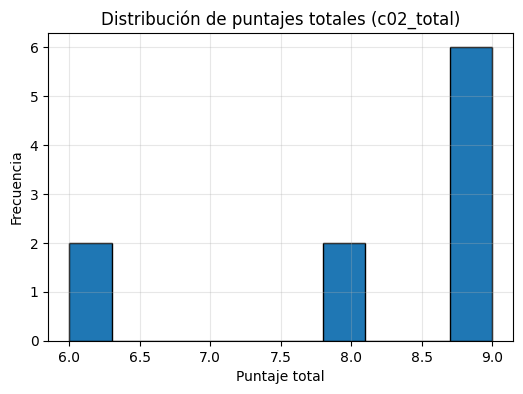

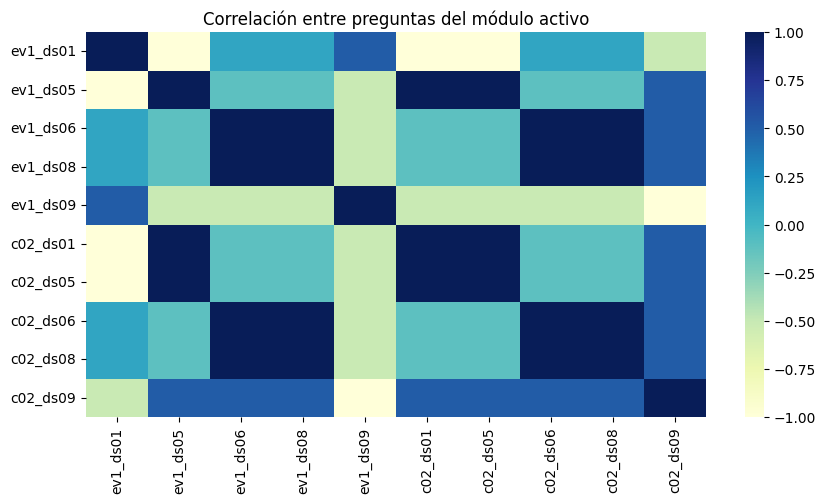

💡 Promedio general de aciertos: 0.74

🔻 5 preguntas con menor promedio de acierto:


c02_ds06    0.9
c02_ds08    0.9
c02_ds09    0.7
ev1_ds09    0.3
ev1_ds01    0.1
dtype: object

💾 Resumen exportado como 'module_c02_performance_summary.csv'


In [94]:
# === BLOQUE 4.2: Análisis de desempeño por pregunta (módulo activo) ===
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Cargar asignaciones del paso anterior
import json
with open("/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/evaluation_question_mapping.json") as f:
    mapping = json.load(f)

active_total = "c02_total"
active_items = mapping.get(active_total, [])

print(f"📘 Módulo activo: {active_total}")
print(f"Preguntas analizadas: {len(active_items)} → {active_items[:10]}\n")

# 2️⃣ Subset de preguntas válidas
module_df = df[active_items + [active_total]].dropna(subset=[active_total])

# 3️⃣ Calcular métricas por pregunta
question_means = module_df[active_items].mean().sort_values(ascending=False)
question_df = question_means.reset_index()
question_df.columns = ["question", "mean_score"]

# 4️⃣ Distribución del total
plt.figure(figsize=(6,4))
plt.hist(module_df[active_total], bins=10, edgecolor="black")
plt.title("Distribución de puntajes totales (c02_total)")
plt.xlabel("Puntaje total")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

# 5️⃣ Heatmap de desempeño por pregunta
plt.figure(figsize=(10,5))
sns.heatmap(module_df[active_items].corr(), cmap="YlGnBu", annot=False)
plt.title("Correlación entre preguntas del módulo activo")
plt.show()

# 6️⃣ Promedio general y top ítems
avg_score = question_means.mean()
top_low = question_means.tail(5)

print(f"💡 Promedio general de aciertos: {avg_score:.2f}")
print("\n🔻 5 preguntas con menor promedio de acierto:")
display(top_low)

# 7️⃣ Exportar resumen
question_df.to_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/module_c02_performance_summary.csv",
    index=False
)

print("💾 Resumen exportado como 'module_c02_performance_summary.csv'")

📊 Estadísticas principales:
- Media: 8.20
- Desviación estándar: 1.23
- IQR: 1.00 (Q1=8.00, Q3=9.00)


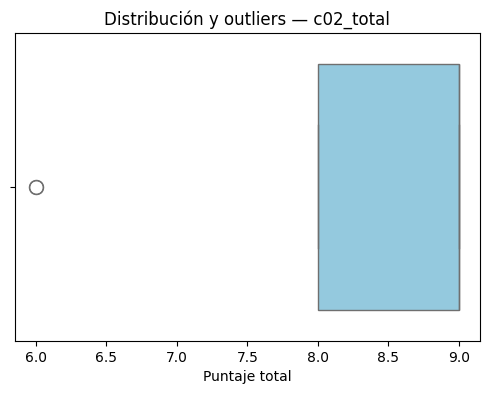

,c02_total,participant_id,status
0,9.0,1,Normal
2,9.0,3,Normal
5,9.0,6,Normal
7,9.0,8,Normal
8,9.0,9,Normal


,c02_total,participant_id,status
9,9.0,10,Normal
4,8.0,5,Normal
6,8.0,7,Normal
1,6.0,2,Low performer
3,6.0,4,Low performer



⚠️ Distribución de categorías:
status
Normal           8
Low performer    2
Name: count, dtype: int64
💾 Exportado como 'module_c02_individual_performance.csv'


In [95]:
# === BLOQUE 4.3: Ranking de desempeño individual y detección de outliers ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Cargar base del módulo activo (c02_total)
active_total = "c02_total"
score_df = df[[active_total]].copy()
score_df = score_df.dropna().reset_index(drop=True)
score_df["participant_id"] = score_df.index + 1  # asignar un ID temporal

# 2️⃣ Estadísticas descriptivas
mean_score = score_df[active_total].mean()
std_score = score_df[active_total].std()
q25, q75 = score_df[active_total].quantile([0.25, 0.75])
iqr = q75 - q25

print(f"📊 Estadísticas principales:")
print(f"- Media: {mean_score:.2f}")
print(f"- Desviación estándar: {std_score:.2f}")
print(f"- IQR: {iqr:.2f} (Q1={q25:.2f}, Q3={q75:.2f})")

# 3️⃣ Detección de outliers
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
score_df["status"] = np.where(
    (score_df[active_total] < lower_bound), "Low performer",
    np.where(score_df[active_total] > upper_bound, "High performer", "Normal")
)

# 4️⃣ Visualización
plt.figure(figsize=(6,4))
sns.boxplot(x=score_df[active_total], color="skyblue", fliersize=10)
plt.title(f"Distribución y outliers — {active_total}")
plt.xlabel("Puntaje total")
plt.show()

# 5️⃣ Ranking
ranking_df = score_df.sort_values(by=active_total, ascending=False)
display(ranking_df.head(5))
display(ranking_df.tail(5))

# 6️⃣ Conteo de outliers
outliers_summary = score_df["status"].value_counts()
print("\n⚠️ Distribución de categorías:")
print(outliers_summary)

# 7️⃣ Exportar resumen individual
score_df.to_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/module_c02_individual_performance.csv",
    index=False
)
print("💾 Exportado como 'module_c02_individual_performance.csv'")

In [96]:
# Vista previa del merge
merged_preview = base_df.merge(
    att_df[["email", "module", "country"]],
    on="email", how="left", indicator=True
)

merged_preview["_merge"].value_counts(normalize=True)

_merge
left_only     0.572864
both          0.427136
right_only    0.000000
Name: proportion, dtype: float64

In [97]:
# --- MERGE FINAL Y CLASIFICACIÓN DE PARTICIPACIÓN ---

merged_final = base_df.merge(
    att_df[["email", "module", "country"]],
    on="email",
    how="left",
    indicator=True
)

# Clasificar estado
merged_final["status"] = merged_final["_merge"].map({
    "both": "Attended",
    "left_only": "Registered_only",
    "right_only": "Unmatched"
})

# Verificar conteos
print("Distribución de estados:")
print(merged_final["status"].value_counts(normalize=True).round(2))

# Exportar merge final
merged_final.to_csv(
    "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/merged_final_status.csv",
    index=False
)

print("💾 Archivo exportado como 'merged_final_status.csv'")

Distribución de estados:
status
Registered_only    0.57
Attended           0.43
Unmatched          0.00
Name: proportion, dtype: float64
💾 Archivo exportado como 'merged_final_status.csv'


In [105]:
# forus_dashboard_app.py
# Dash 3.2.0 | Plotly 6.3.1 | dash-bootstrap-components 2.0.4

import os
import pandas as pd
from datetime import datetime

import dash
from dash import Dash, html, dcc, Input, Output, State, dash_table, callback_context
import dash_bootstrap_components as dbc
import plotly.express as px

# ---------------------------
# 1) CARGA ROBUSTA DE DATOS
# ---------------------------

# Rutas esperadas según tu notebook
BASE_DIR = "/Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS"
P_DATA = os.path.join(BASE_DIR, "data_clean")

PATH_MERGED_STATUS = os.path.join(P_DATA, "merged_final_status.csv")  # 161 filas
PATH_ATT_FULL      = os.path.join(P_DATA, "merged_attendance_full.csv")  # evaluación (si existe)
PATH_NORM_ALL      = os.path.join(P_DATA, "normalized", "All_Modules_Normalized_v2.csv")  # 22 filas (AI_for_NGOs)

def load_csv_safe(path, parse_dates=None):
    try:
        if os.path.exists(path):
            df = pd.read_csv(path, parse_dates=parse_dates)
            print(f"✅ Cargado: {path} | shape={df.shape}")
            return df
        else:
            print(f"⚠️ No existe: {path}")
            return None
    except Exception as e:
        print(f"❌ Error cargando {path}: {e}")
        return None

base_status = load_csv_safe(PATH_MERGED_STATUS)
att_full    = load_csv_safe(PATH_ATT_FULL)
norm_all    = load_csv_safe(PATH_NORM_ALL)

# Fallback mínimo si no existen archivos
if base_status is None:
    base_status = pd.DataFrame({
        "email": ["a@ngo.org","b@ngo.org","c@ngo.org","a@ngo.org"],
        "module": ["NGO Management and AI Ethics in Operation",
                   "Digital Security and Risk Management",
                   "Resource Mobilization for CSOs in a Digital Context",
                   None],
        "Country": ["France","Uruguay","Togo","France"],  # si tu CSV trae 'Country'
        "country": ["France","Uruguay","Togo","France"],  # o 'country'
        "_merge": ["both","both","both","left_only"],
        "status": ["Attended","Attended","Attended","Registered_only"],
        "language": ["inglés","español","francés","español"],
        "organisation": ["CONCORD","ANONG","TANGO","CONCORD"]
    })

# Normaliza nombres de columnas clave
def std_cols(df):
    df = df.copy()
    cols = {c.lower(): c for c in df.columns}
    # Remap comunes
    rename_map = {}
    if "country" in cols:
        rename_map[cols["country"]] = "country"
    if "module" in cols:
        rename_map[cols["module"]] = "module"
    if "email" in cols:
        rename_map[cols["email"]] = "email"
    if "status" in cols:
        rename_map[cols["status"]] = "status"
    if "language" in cols:
        rename_map[cols["language"]] = "language"
    if "organisation" in cols:
        rename_map[cols["organisation"]] = "organisation"
    df = df.rename(columns=rename_map)
    return df

base_status = std_cols(base_status)
if att_full is not None:
    att_full = std_cols(att_full)
if norm_all is not None:
    norm_all = std_cols(norm_all)

# Columna country: algunos CSV usan 'Country' TitleCase
if "country" not in base_status.columns and "Country" in base_status.columns:
    base_status["country"] = base_status["Country"]

# ---------------------------
# 2) DERIVADOS Y LISTAS
# ---------------------------

# Módulos "bonitos" conocidos
MODULE_CANON = [
    "NGO Management and AI Ethics in Operation",
    "Digital Security and Risk Management",
    "Resource Mobilization for CSOs in a Digital Context",
    "Public Speaking for Global Leaders",
]

def compute_kpis(df):
    df = df.copy()
    total_people = df["email"].nunique() if "email" in df else 0
    attended_people = df.loc[df.get("status","")=="Attended", "email"].nunique() if "status" in df else 0
    attendance_rate = (attended_people/total_people*100) if total_people else 0.0
    by_module = pd.Series(dtype=int)
    if "module" in df.columns:
        by_module = df.loc[df["module"].notna(), "module"].value_counts().reindex(MODULE_CANON, fill_value=0)
    return total_people, attended_people, attendance_rate, by_module

TOTAL_PPL, ATT_PPL, RATE, BY_MODULE_SER = compute_kpis(base_status)

LANGS = sorted([x for x in base_status.get("language", pd.Series()).dropna().unique()]) or ["español","inglés","francés"]
MODULES = [m for m in MODULE_CANON if m in base_status.get("module", pd.Series()).unique()] or MODULE_CANON
COUNTRIES = sorted([x for x in base_status.get("country", pd.Series()).dropna().unique()])[:300]

# ---------------------------
# 3) APP & LAYOUT
# ---------------------------

external_stylesheets = [dbc.themes.BOOTSTRAP]
app = Dash(__name__, external_stylesheets=external_stylesheets, title="Forus Dashboard v2")

def kpi_card(title, value, id_value=None):
    return dbc.Card(
        dbc.CardBody([
            html.Div(title, className="text-muted"),
            html.H3(value, id=id_value, className="mb-0"),
        ]),
        className="shadow-sm rounded-4"
    )

def make_controls():
    return dbc.Card(
        dbc.CardBody([
            html.Div("Filtros", className="fw-bold mb-2"),
            dbc.Row([
                dbc.Col(dcc.Dropdown(
                    id="module-filter",
                    options=[{"label":m, "value":m} for m in MODULES],
                    value=None,
                    placeholder="Filtrar por módulo"
                ), md=6),
                dbc.Col(dcc.Dropdown(
                    id="language-filter",
                    options=[{"label":l, "value":l} for l in LANGS],
                    value=None,
                    placeholder="Filtrar por idioma"
                ), md=6),
            ], className="g-2"),
            dbc.Row([
                dbc.Col(dcc.Dropdown(
                    id="country-filter",
                    options=[{"label":c, "value":c} for c in COUNTRIES],
                    value=None,
                    placeholder="Filtrar por país"
                ), md=12),
            ], className="g-2 mt-1"),
            dbc.Button("Limpiar filtros", id="clear-filters", color="secondary", className="mt-2", size="sm")
        ]),
        className="shadow-sm rounded-4"
    )

app.layout = dbc.Container([
    html.H2("FORUS — Learning Modules Dashboard", className="mt-3 mb-1"),
    html.Div("Estado general de registros, asistencia y módulos. (Build: {})".format(datetime.now().strftime("%Y-%m-%d %H:%M")),

             className="text-muted mb-3"),

    # KPIs
    dbc.Row([
        dbc.Col(kpi_card("Personas registradas", f"{TOTAL_PPL}", "kpi-total"), md=3),
        dbc.Col(kpi_card("Personas con asistencia", f"{ATT_PPL}", "kpi-att"), md=3),
        dbc.Col(kpi_card("Tasa de asistencia", f"{RATE:.2f}%", "kpi-rate"), md=3),
        dbc.Col(kpi_card("Módulos activos", f"{(base_status['module'].nunique() if 'module' in base_status else 0)}", "kpi-mods"), md=3),
    ], className="g-3"),

    # Filtros
    dbc.Row([
        dbc.Col(make_controls(), md=12)
    ], className="g-3 mt-1"),

    # Gráficas
    dbc.Row([
        dbc.Col(dcc.Graph(id="bar-modules"), md=6),
        dbc.Col(dcc.Graph(id="pie-status"), md=6),
    ], className="g-3"),

    dbc.Row([
        dbc.Col(dcc.Graph(id="map-countries"), md=12),
    ], className="g-3"),

    # Tabla detalle
    dbc.Row([
        dbc.Col(html.H5("Detalle de registros / asistencia"), md=12),
        dbc.Col(dash_table.DataTable(
            id="table-detail",
            columns=[{"name": c, "id": c} for c in [col for col in base_status.columns if col in ["email","module","status","country","language","organisation"]]],
            page_size=10,
            style_table={"overflowX":"auto"},
            filter_action="native",
            sort_action="native",
            style_cell={"fontFamily":"Inter, system-ui, -apple-system", "fontSize":"14px", "padding":"8px"},
            style_header={"fontWeight":"bold"}
        ), md=12)
    ], className="g-3 mb-4")
], fluid=True)

# ---------------------------
# 4) CALLBACKS
# ---------------------------

def apply_filters(df, module, language, country):
    df = df.copy()
    if module:
        df = df[df["module"] == module]
    if language and "language" in df.columns:
        df = df[df["language"] == language]
    if country and "country" in df.columns:
        df = df[df["country"] == country]
    return df

@app.callback(
    Output("module-filter", "value"),
    Output("language-filter", "value"),
    Output("country-filter", "value"),
    Input("clear-filters", "n_clicks"),
    prevent_initial_call=True
)
def clear_filters(n):
    return None, None, None

@app.callback(
    Output("kpi-total", "children"),
    Output("kpi-att", "children"),
    Output("kpi-rate", "children"),
    Output("kpi-mods", "children"),
    Output("bar-modules", "figure"),
    Output("pie-status", "figure"),
    Output("map-countries", "figure"),
    Output("table-detail", "data"),
    Input("module-filter", "value"),
    Input("language-filter", "value"),
    Input("country-filter", "value"),
)
def update_dashboard(module, language, country):
    df = base_status.copy()
    df = apply_filters(df, module, language, country)

    total = df["email"].nunique() if "email" in df else 0
    att = df.loc[df.get("status","")=="Attended", "email"].nunique() if "status" in df else 0
    rate = f"{(att/total*100 if total else 0):.2f}%"
    nmods = df["module"].nunique() if "module" in df else 0

    # Bar por módulo
    if "module" in df.columns:
        mod_counts = df[df["module"].notna()]["module"].value_counts().reset_index()
        mod_counts.columns = ["module","count"]
        fig_bar = px.bar(mod_counts, x="module", y="count", title="Registros por módulo")
        fig_bar.update_layout(margin=dict(l=10,r=10,t=40,b=10))
    else:
        fig_bar = px.bar(pd.DataFrame({"module":[],"count":[]}), x="module", y="count", title="Registros por módulo")

    # Pie por status
    if "status" in df.columns:
        st_counts = df["status"].value_counts().reset_index()
        st_counts.columns = ["status","count"]
        fig_pie = px.pie(st_counts, names="status", values="count", title="Distribución por estado")
    else:
        fig_pie = px.pie(pd.DataFrame({"status":[],"count":[]}), names="status", values="count", title="Distribución por estado")
    fig_pie.update_layout(margin=dict(l=10,r=10,t=40,b=10))

    # Mapa (country names)
    if "country" in df.columns and df["country"].notna().any():
        cnt = df["country"].value_counts().reset_index()
        cnt.columns = ["country","count"]
        fig_map = px.choropleth(
            cnt, locations="country", locationmode="country names",
            color="count", title="Distribución geográfica (registros)"
        )
        fig_map.update_layout(margin=dict(l=10,r=10,t=40,b=10))
    else:
        fig_map = px.choropleth(pd.DataFrame({"country":[],"count":[]}),
                                locations="country", color="count",
                                title="Distribución geográfica (registros)")
        fig_map.update_layout(margin=dict(l=10,r=10,t=40,b=10))

    # Tabla
    visible_cols = [c for c in ["email","module","status","country","language","organisation"] if c in df.columns]
    data_table = df[visible_cols].fillna("").to_dict("records")

    return str(total), str(att), rate, str(nmods), fig_bar, fig_pie, fig_map, data_table

# ---------------------------
# 5) RUN
# ---------------------------

if __name__ == "__main__":
    # Recomendado: levantar como servidor externo (evita errores de Jupyter con FormattedTB/color_scheme)
    app.run(host="0.0.0.0", port=8050, debug=False)

    # Si necesitas correr en Jupyter y tienes jupyter-dash:
from jupyter_dash import JupyterDash
app_j = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app_j.layout = app.layout
app_j.run(mode="external", port=8050, debug=False)

✅ Cargado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/merged_final_status.csv | shape=(199, 18)
✅ Cargado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/merged_attendance_full.csv | shape=(199, 19)
✅ Cargado: /Users/santiagopulgarinrodriguez/PROYECTO_INNOVUS/data_clean/normalized/All_Modules_Normalized_v2.csv | shape=(22, 4)


/Users/santiagopulgarinrodriguez/jupyter_env/lib/python3.12/site-packages/dash/dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

